In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn import decomposition
from sklearn import ensemble

In [3]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Electricity Bill.csv"
df = pd.read_csv(path)

In [4]:
df.head()

Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

     Building_Status Maintenance_Priority  Energy_Per_SqM  \
0  Under Maintenance                 High      174.835708   
1  Under Maintenance                 High      143.086785   
2        Operational               Medium      182.384427   
3             Closed                  Low      226.151493   
4             Closed               Medium      138.292331   

   Number_of_Residents  Electricity_Bill  
0                  360      16408.008770  
1                   91      15230.425070  
2                  115       8117.632795  
3                  159      13030.707160  
4                  258      25848.853740

In [5]:
df.shape

(1250, 16)

In [6]:
df.isnull()

Building_Type  Construction_Year  Number_of_Floors  \
0             False              False             False   
1             False              False             False   
2             False              False             False   
3             False              False             False   
4             False              False             False   
...             ...                ...               ...   
1245          False              False             False   
1246          False              False             False   
1247          False              False             False   
1248          False              False             False   
1249          False              False             False   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                          False                     False   
1                          False                     False   
2                          False                     False   
3                          False                     False   
4                          False                     False   
...                          ...                       ...   
1245                       False                     False   
1246                       False                     False   
1247                       False                     False   
1248                       False                     False   
1249                       False                     False   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                         False           False               False   
1                         False           False               False   
2                         False           False               False   
3                         False           False               False   
4                         False           False               False   
...                         ...             ...                 ...   
1245                      False           False               False   
1246                      False           False               False   
1247                      False           False               False   
1248                      False           False               False   
1249                      False           False               False   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                   False            False                        False   
1                   False            False                        False   
2                   False            False                        False   
3                   False            False                        False   
4                   False            False                        False   
...                   ...              ...                          ...   
1245                False            False                        False   
1246                False            False                        False   
1247                False            False                        False   
1248                False            False                        False   
1249                False            False                        False   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
0               False                 False           False   
1               False                 False           False   
2               False                 False           False   
3               False                 False           False   
4               False                 False           False   
...               ...                   ...             ...   
1245            False                 False           False   
1246            False                 False           False   
1247            False                 False           False   
1248            False                 False           False   
1249            False                 False           False   

      Number_of_Residents  El

In [7]:
# How many missing records are there in each column
df.isnull().sum()

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1250 non-null   object 
 1   Construction_Year            1250 non-null   int64  
 2   Number_of_Floors             1250 non-null   int64  
 3   Energy_Consumption_Per_SqM   1250 non-null   float64
 4   Water_Usage_Per_Building     1250 non-null   float64
 5   Waste_Recycled_Percentage    1250 non-null   float64
 6   Occupancy_Rate               1250 non-null   float64
 7   Indoor_Air_Quality           1250 non-null   float64
 8   Smart_Devices_Count          1250 non-null   int64  
 9   Green_Certified              1250 non-null   int64  
 10  Maintenance_Resolution_Time  1250 non-null   float64
 11  Building_Status              1250 non-null   object 
 12  Maintenance_Priority         1250 non-null   object 
 13  Energy_Per_SqM    

In [9]:
# Split dataset into independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

In [11]:
y

0       16408.008770
1       15230.425070
2        8117.632795
3       13030.707160
4       25848.853740
            ...     
1245    10955.774250
1246    17280.830640
1247    11618.171220
1248    11732.247650
1249    14301.781790
Name: Electricity_Bill, Length: 1250, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Concatenate X_train and y_train to form a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])

# Categorical features
categorical_features = X.select_dtypes(include=['object'])

# melted_train_data = numerical_features.melt(var_name='Feature', value_name='Value')

In [13]:
numerical_features

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0                  1989                12                   50.000000   
1                  1980                 6                  225.759107   
2                  2006                10                   98.755927   
3                  1985                 1                   68.470692   
4                  2006                12                   50.000000   
...                 ...               ...                         ...   
1245               1985                10                  147.613313   
1246               2007                 5                   50.000000   
1247               1990                 1                   50.000000   
1248               2021                 6                  250.000000   
1249               2017                 8                  143.821153   

      Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                   477.681762                  48.417266       81.814110   
1                   200.000000                  46.405516       45.109000   
2                   200.000000                  17.247585       48.526225   
3                   200.000000                  57.719480       76.335921   
4                   347.093644                  26.936862       96.511319   
...                        ...                        ...             ...   
1245                677.914745                  29.602927       84.905237   
1246                861.042961                  23.576263       97.506525   
1247               1500.000000                  46.190167       94.054395   
1248               1500.000000                  55.807260       67.780207   
1249               1500.000000                  13.855410       77.499626   

      Indoor_Air_Quality  Smart_Devices_Count  Green_Certified  \
0              13.780635                    6                0   
1              10.177771                   10                0   
2              27.757026                    2                1   
3               1.519812                    2                0   
4               1.874753                   19                0   
...                  ...                  ...              ...   
1245           51.340186                    9                0   
1246          100.000000                    5                0   
1247           13.554989                    1                0   
1248           13.554989                    6                0   
1249           13.554989                    2                1   

      Maintenance_Resolution_Time  Energy_Per_SqM  Number_of_Residents  
0                        7.211768      174.835708                  360  
1                       34.139492      143.086785                   91  
2                        6.224612      182.384427                  115  
3                        5.327398      226.151493                  159  
4                        7.060854      138.292331                  258  
...                           ...             ...                  ...  
1245                     8.304416       88.802987                  371  
1246                     5.810473      151.704173                  289  
1247                     6.761967      111.501338                  237  
1248                    14.147058      161.689296                  196  
1249                     5.844906       72.205218                  391  

[1250 rows x 12 columns]

In [14]:
categorical_features

Building_Type    Building_Status Maintenance_Priority
0       Residential  Under Maintenance                 High
1     Institutional  Under Maintenance                 High
2        Industrial        Operational               Medium
3        Commercial             Closed                  Low
4        Industrial             Closed               Medium
...             ...                ...                  ...
1245    Residential        Operational                  Low
1246     Commercial             Closed                  Low
1247     Commercial  Under Maintenance               Medium
1248  Institutional        Operational               Medium
1249    Residential  Under Maintenance                  Low

[1250 rows x 3 columns]

In [15]:
# Adjusted R2 Score

def adjusted_r2(r2, X, y):
    n = len(y)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# **PART A**

<Figure size 1500x1000 with 0 Axes>

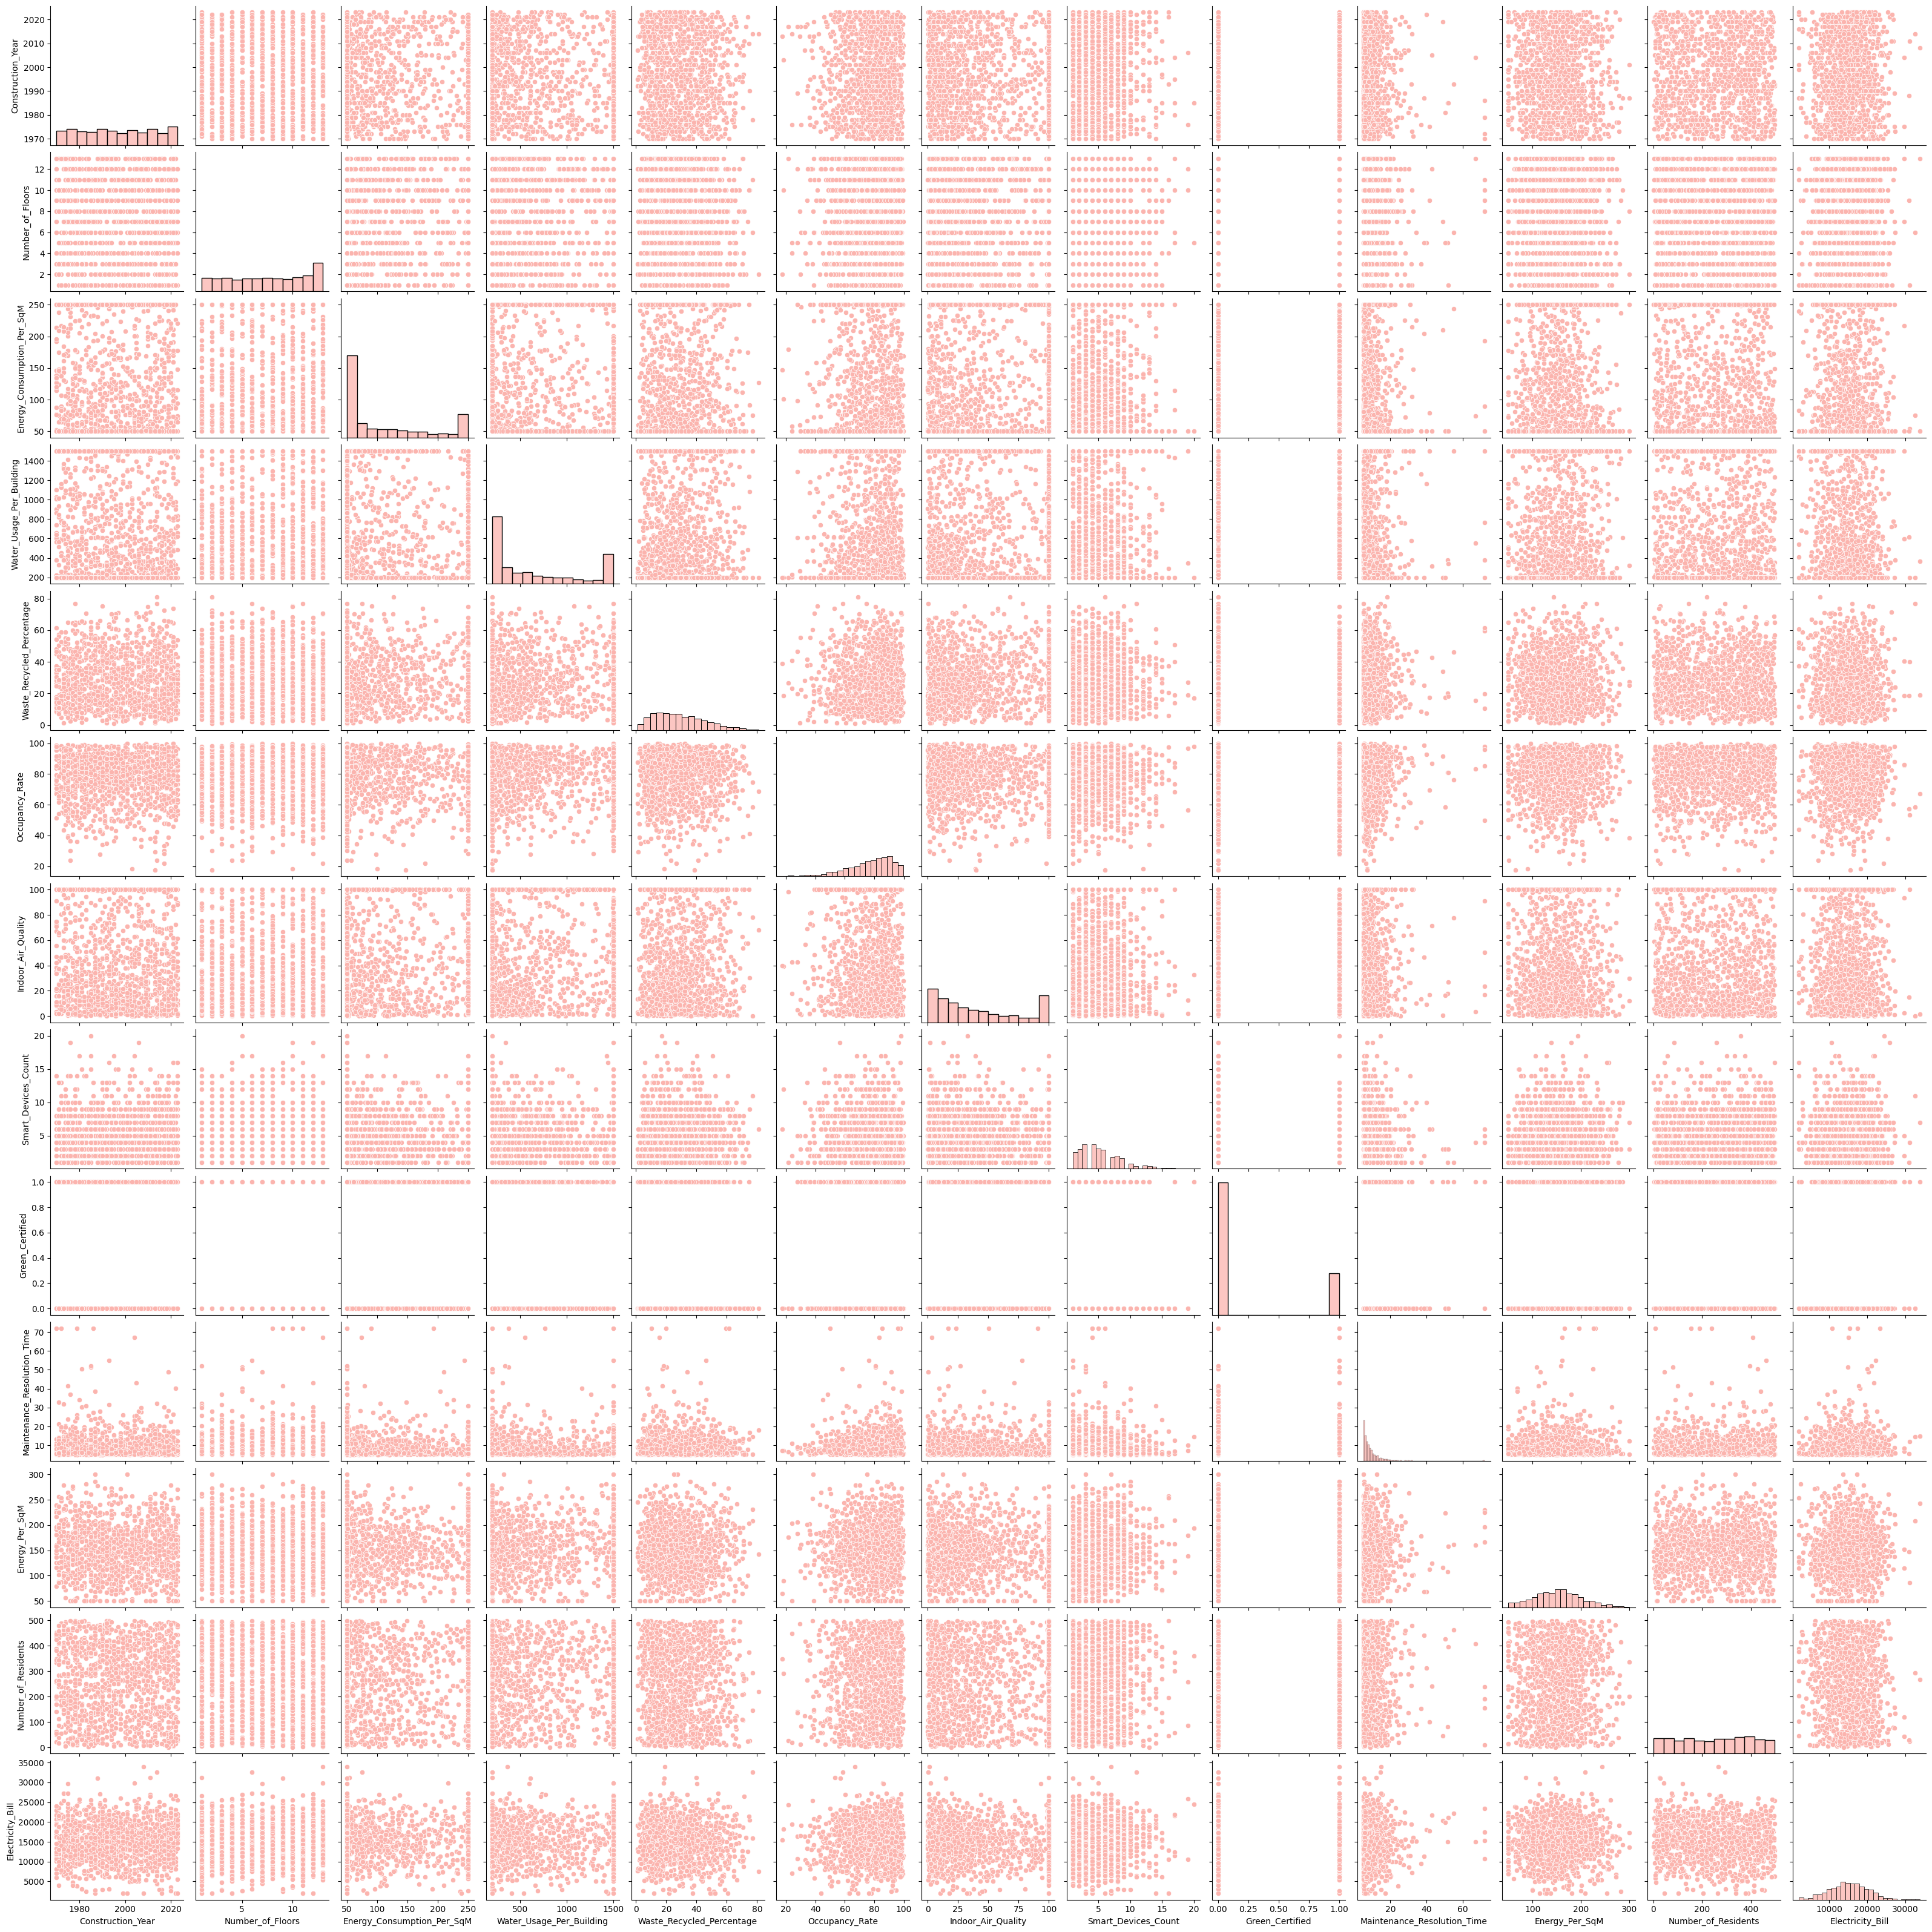

In [16]:
# Perform EDA

# Pair plot
sns.set_palette("Pastel1")
plt.figure(figsize=(15, 10))
sns.pairplot(df)

plt.show()

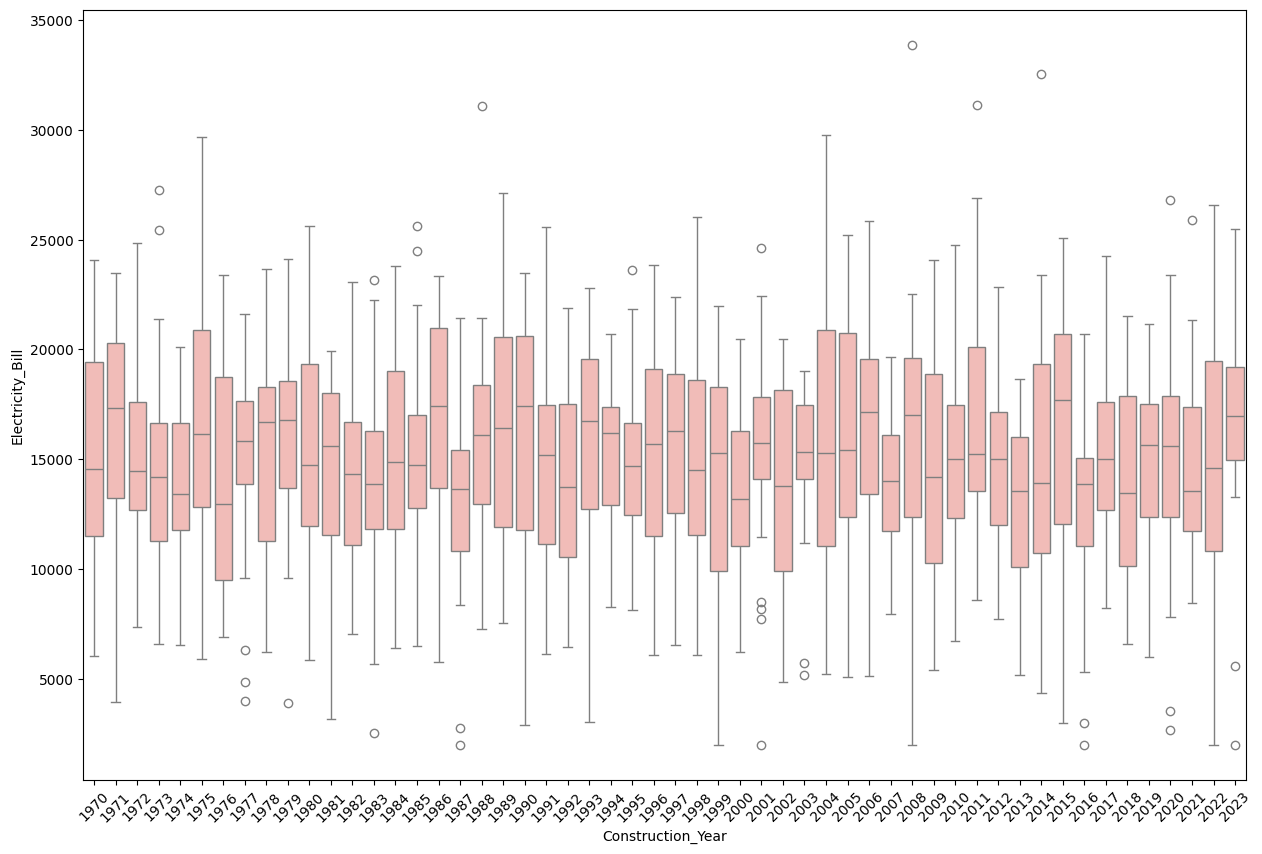

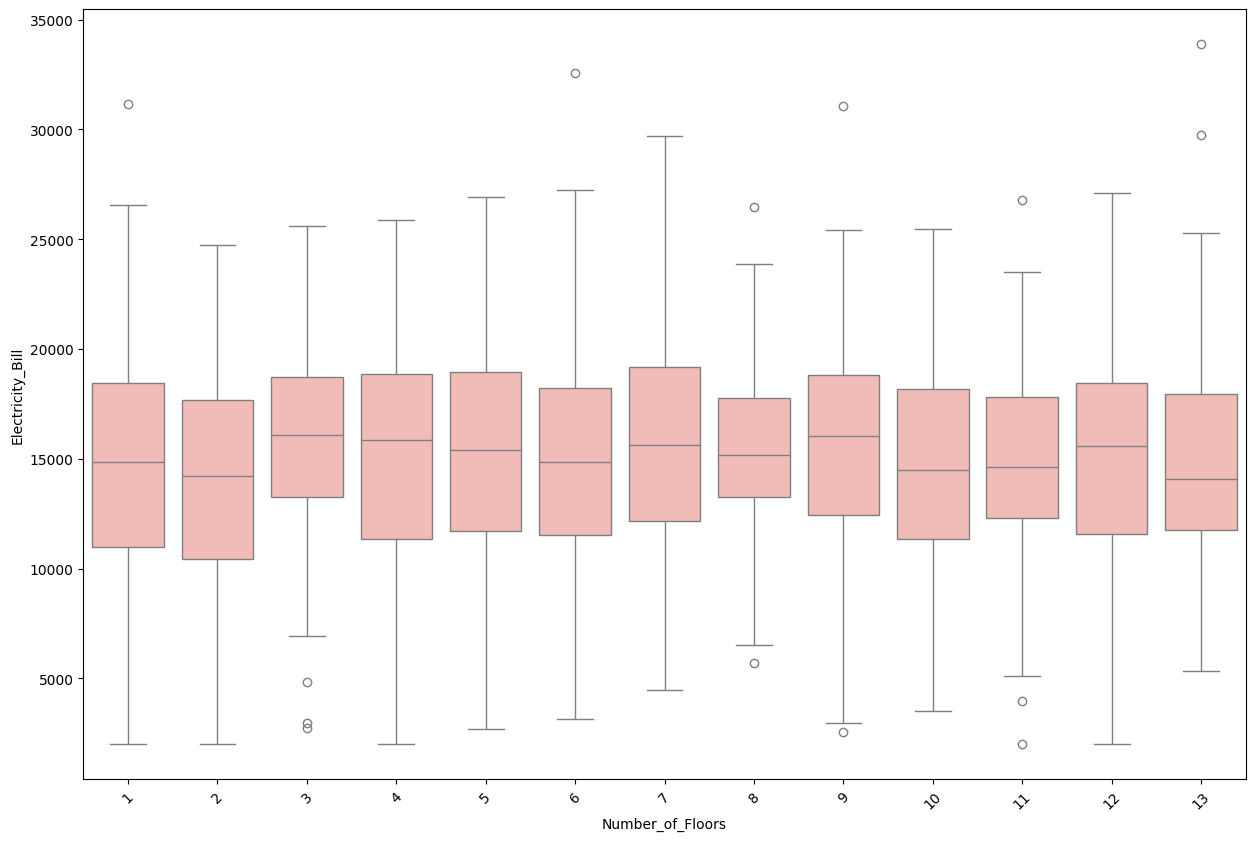

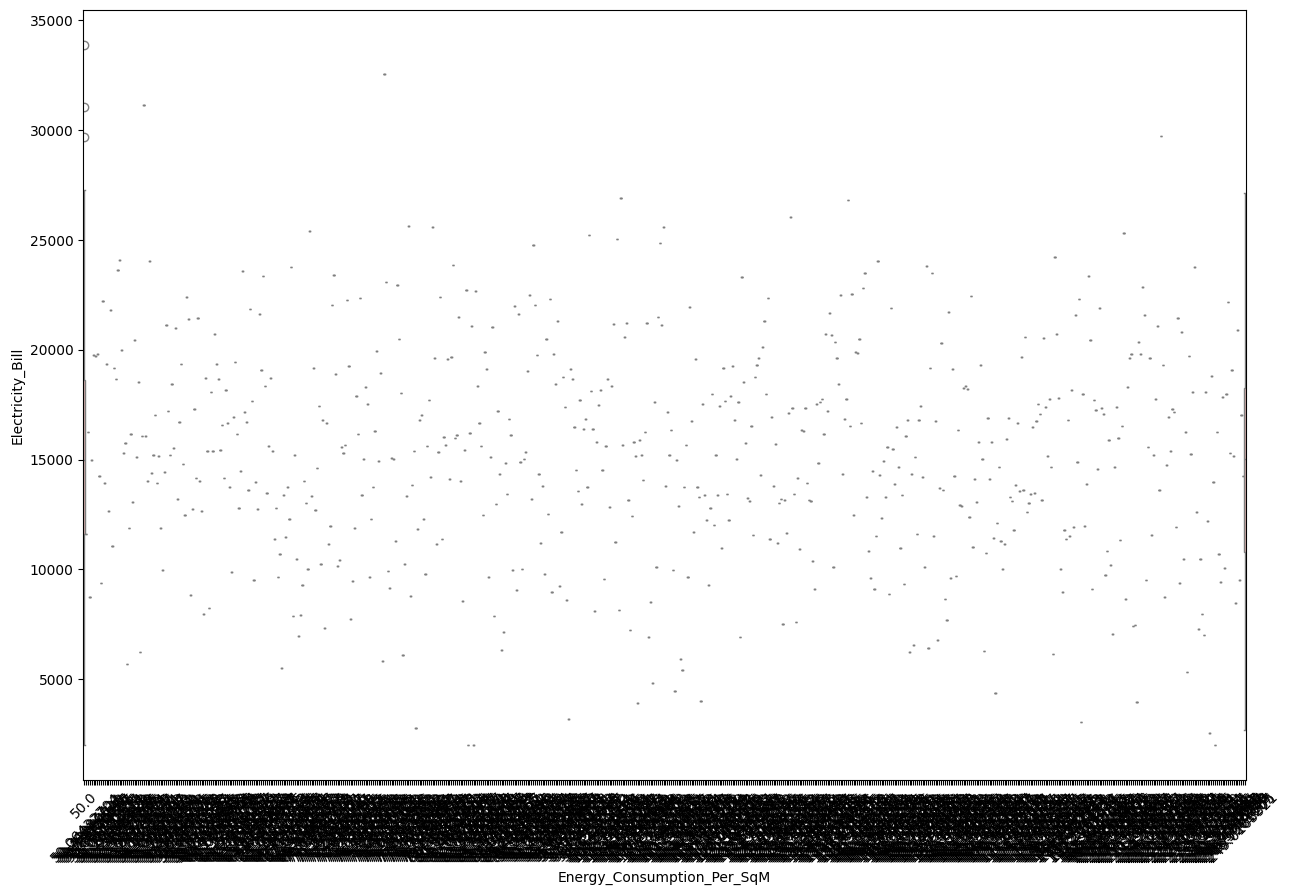

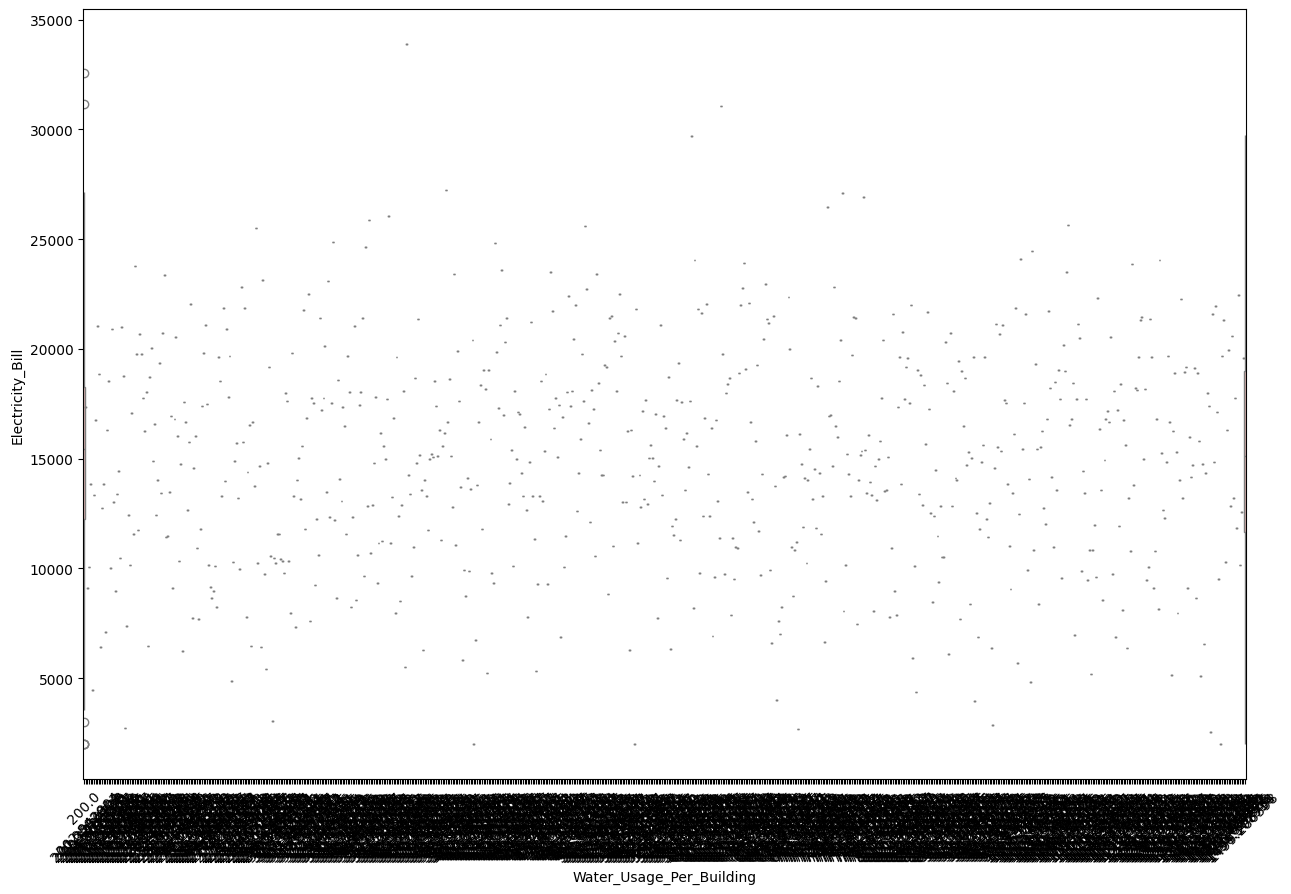

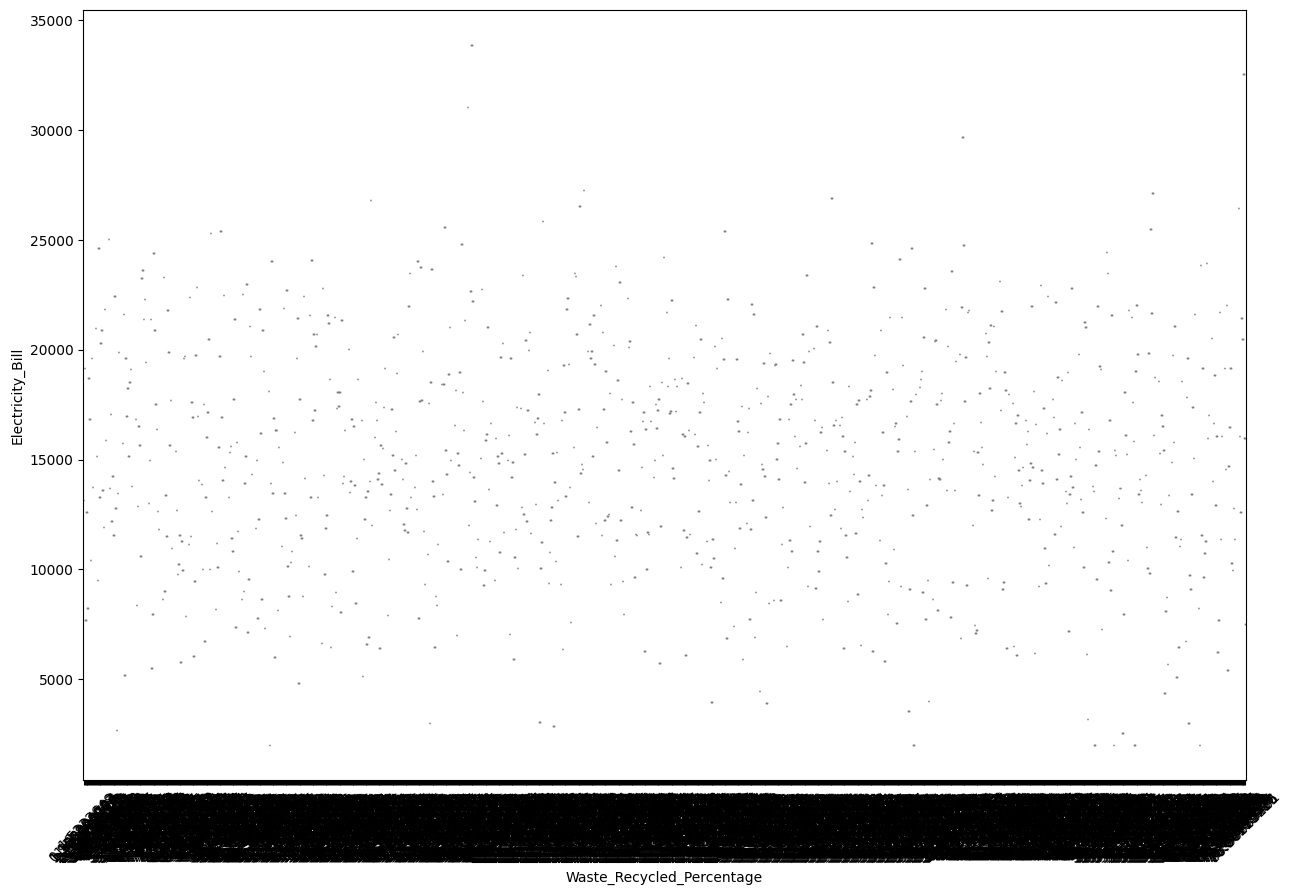

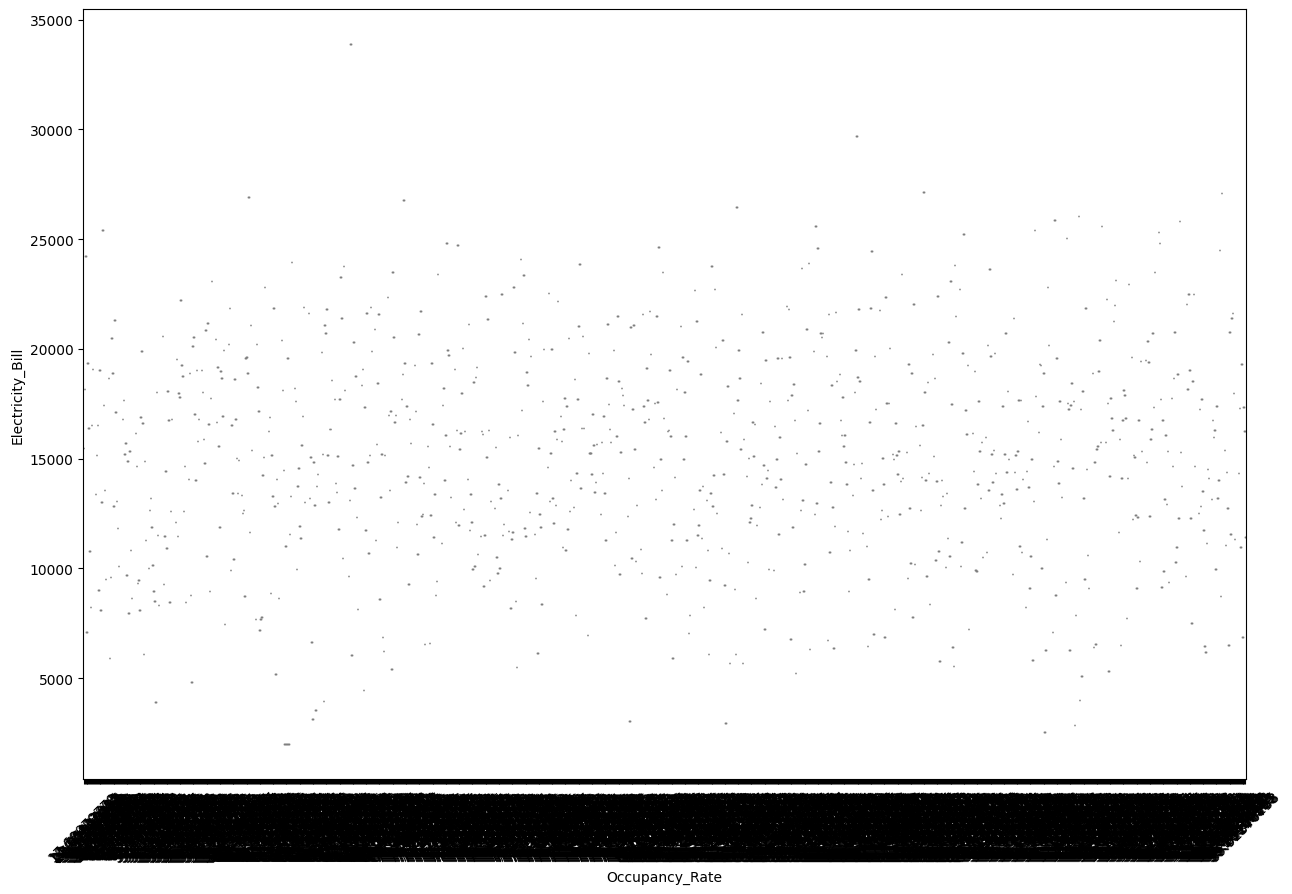

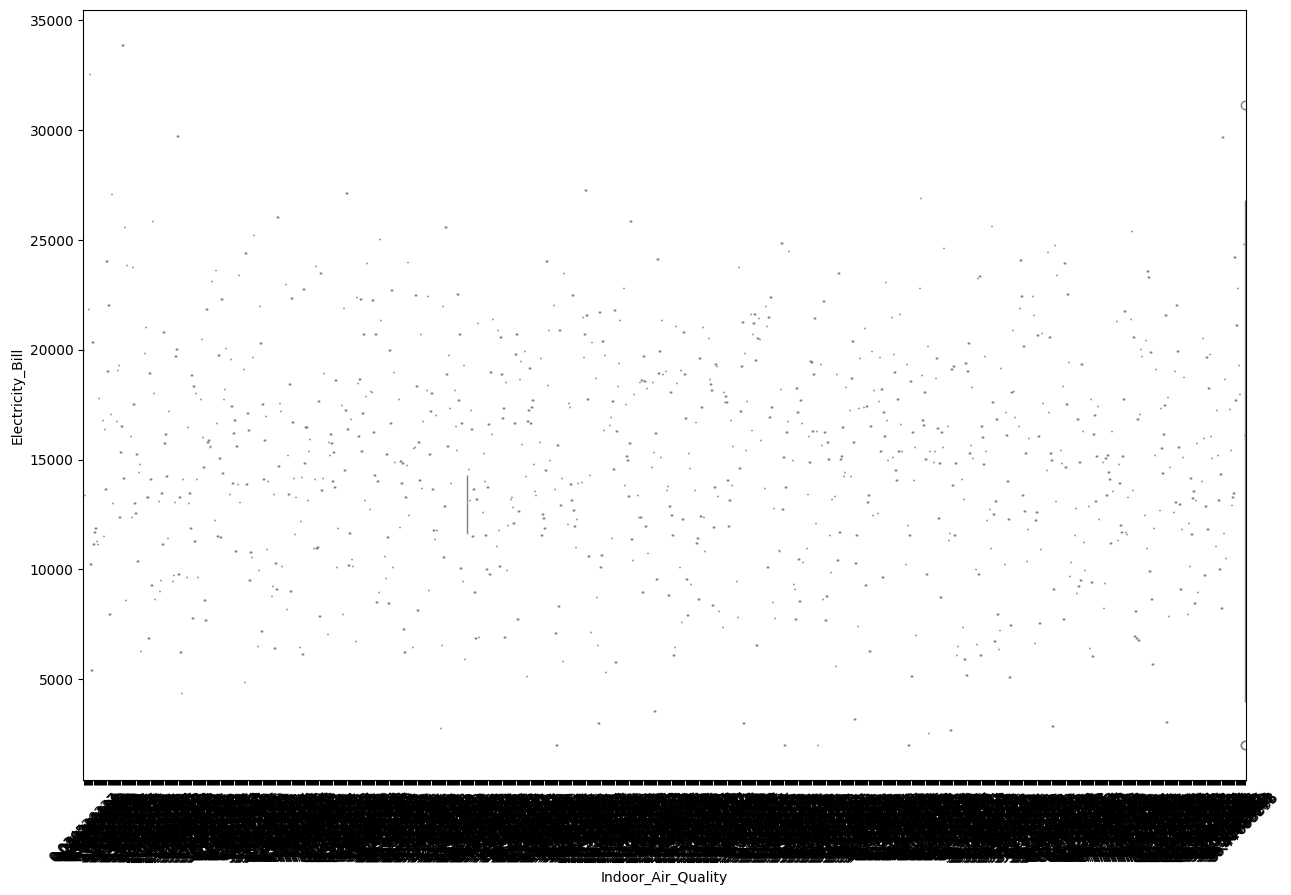

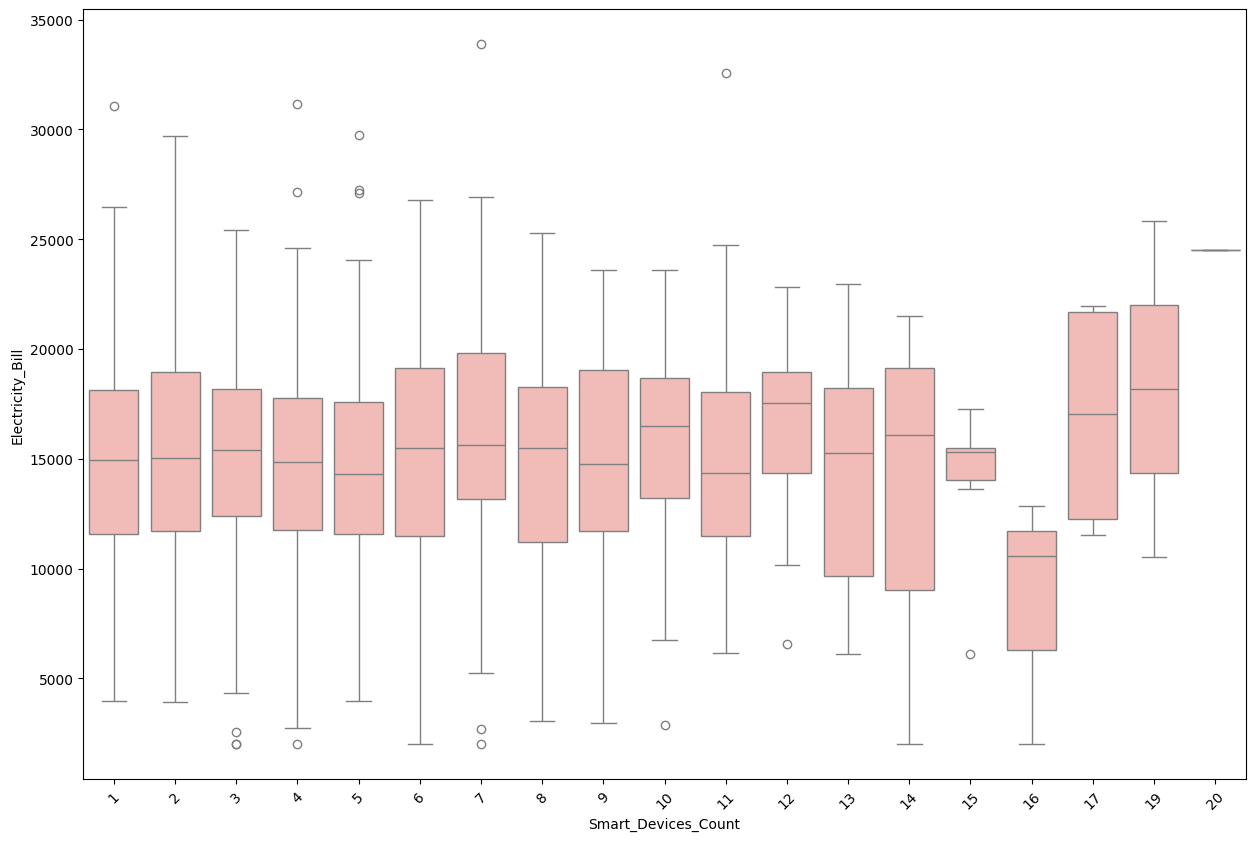

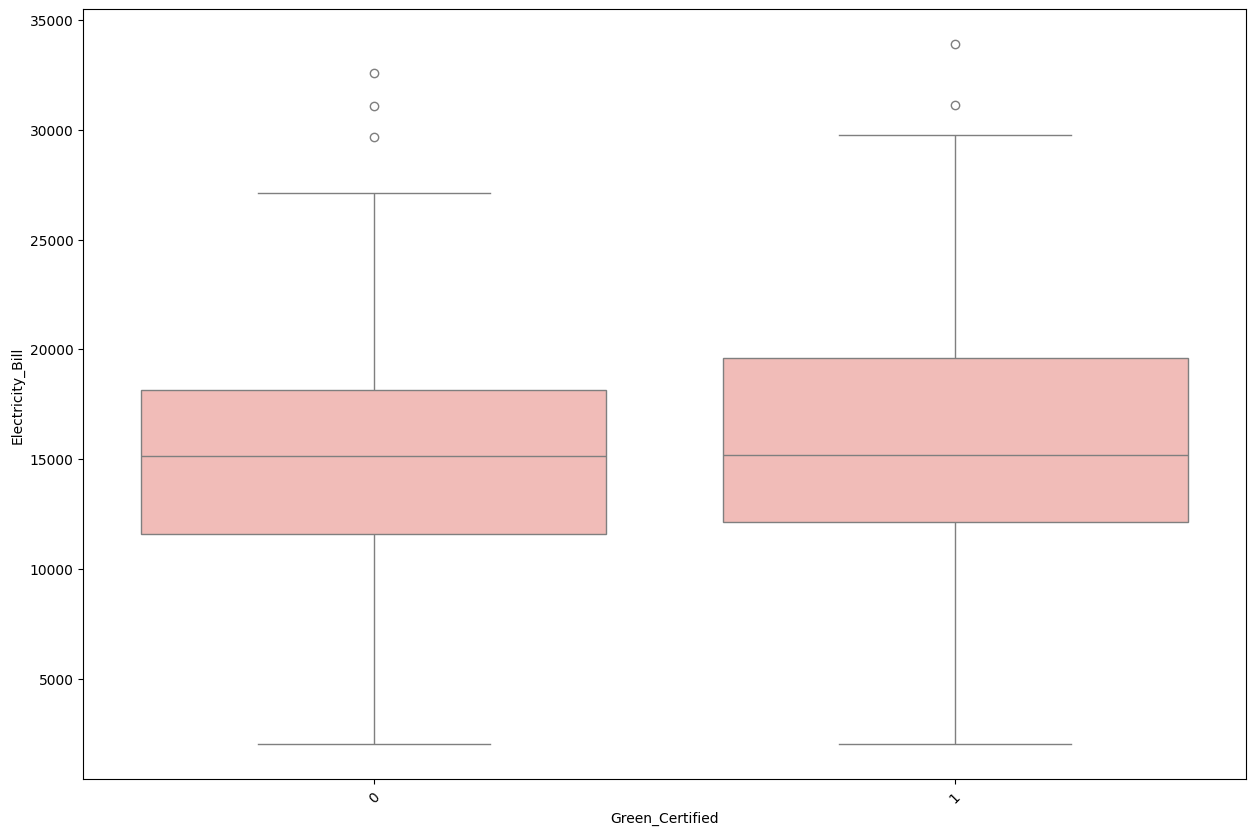

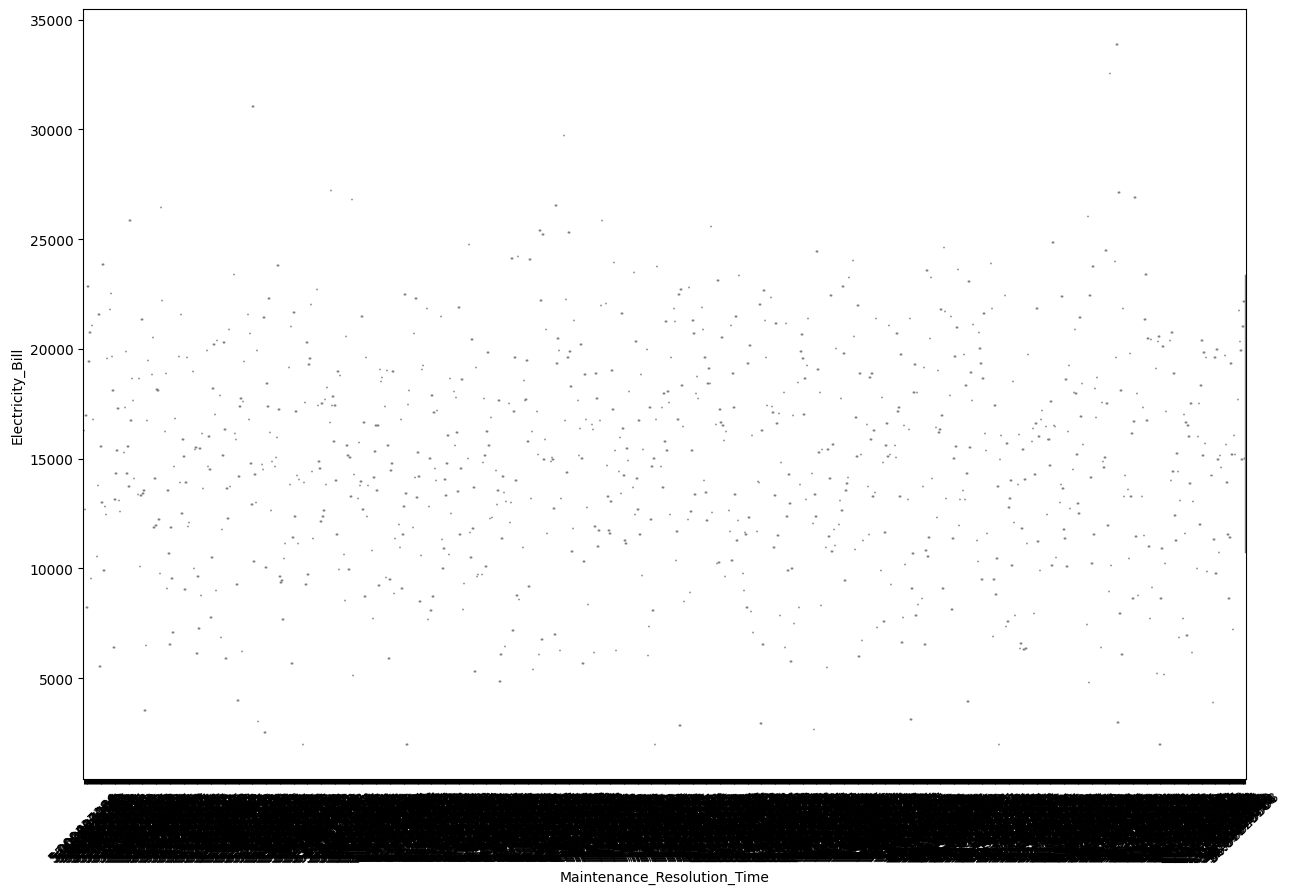

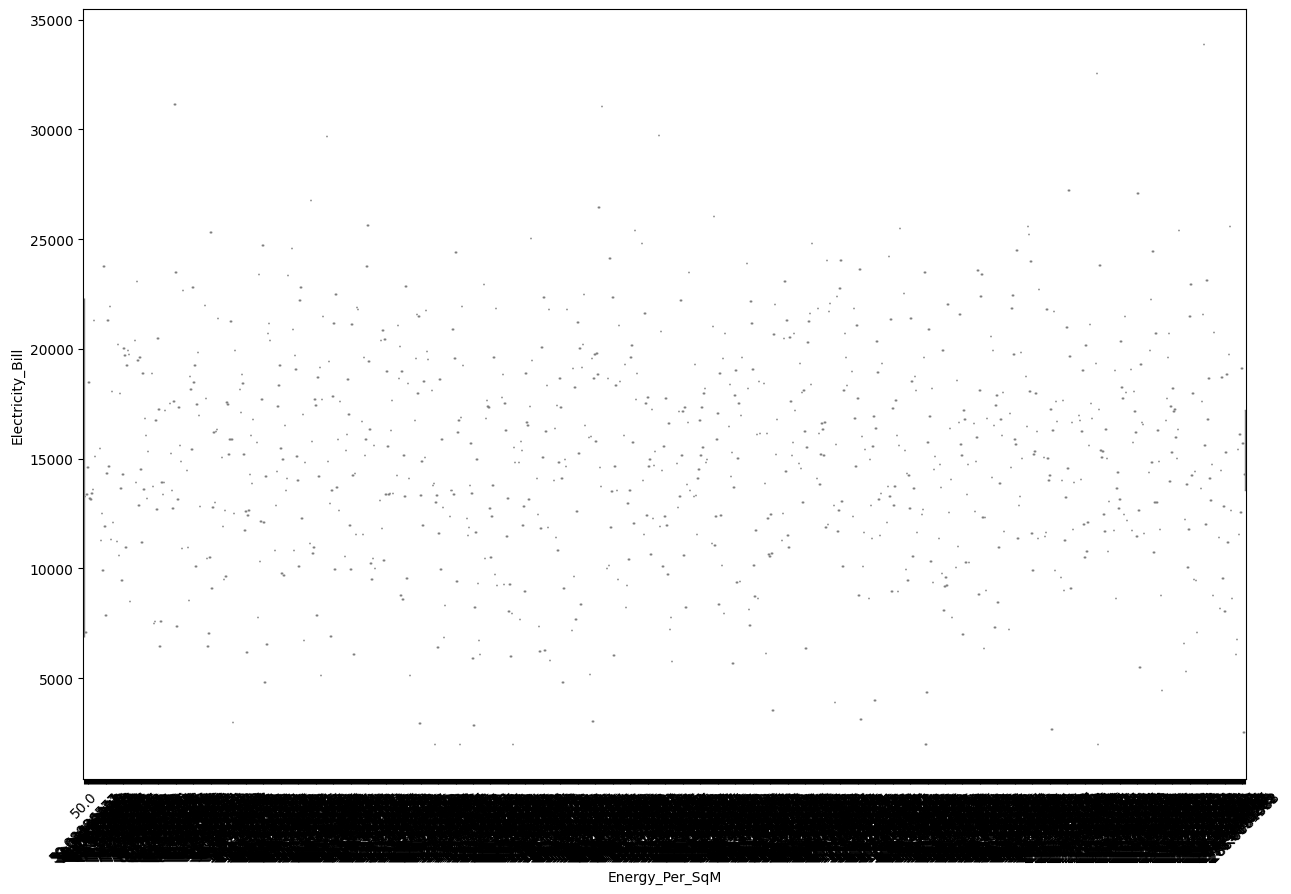

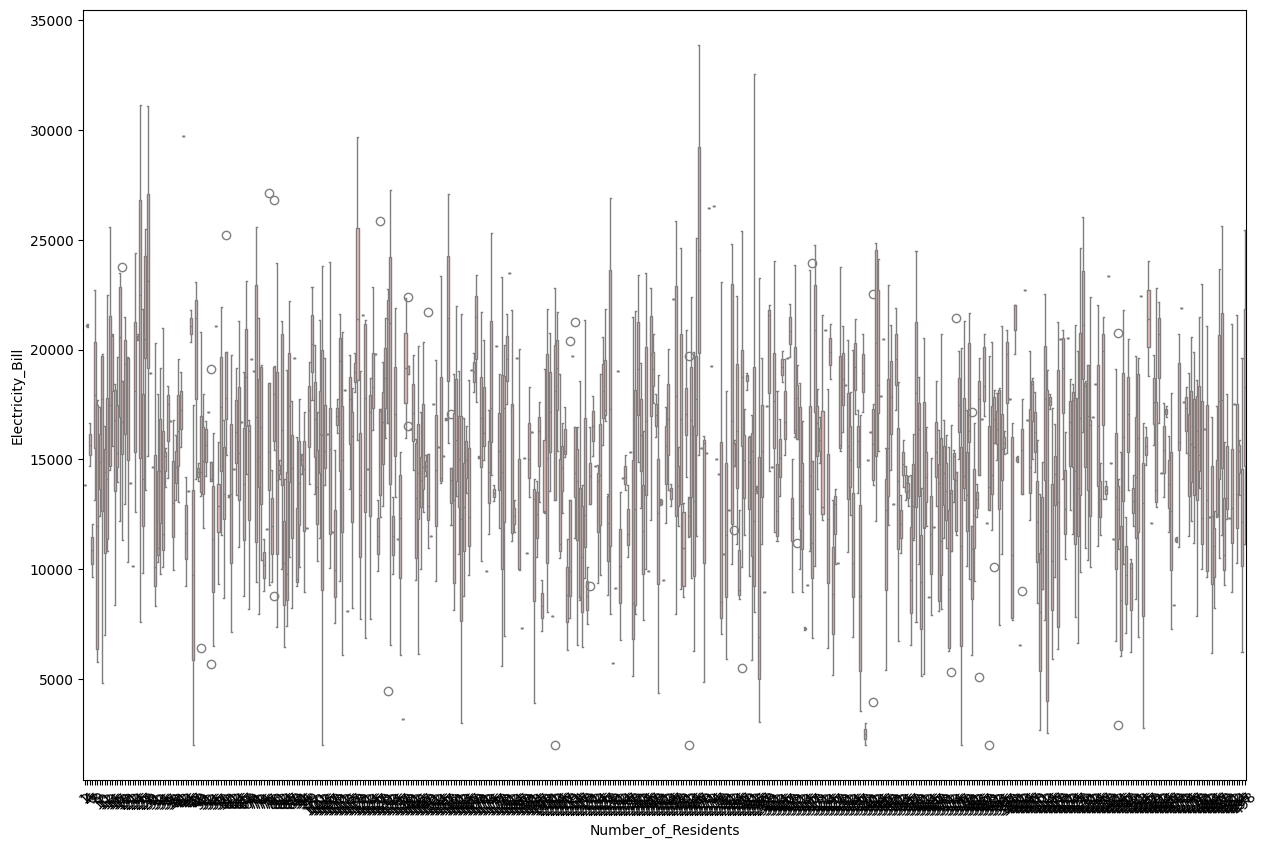

In [17]:
# Box Plot

for f in numerical_features.columns:
  plt.figure(figsize=(15, 10))
  sns.boxplot(x=X[f], y=df['Electricity_Bill'])
  plt.xticks(rotation=45)
  plt.show()

# plt.figure(figsize=(15, 10))
# sns.boxplot(data=numerical_features)
# plt.xticks(rotation=45)
# plt.show()

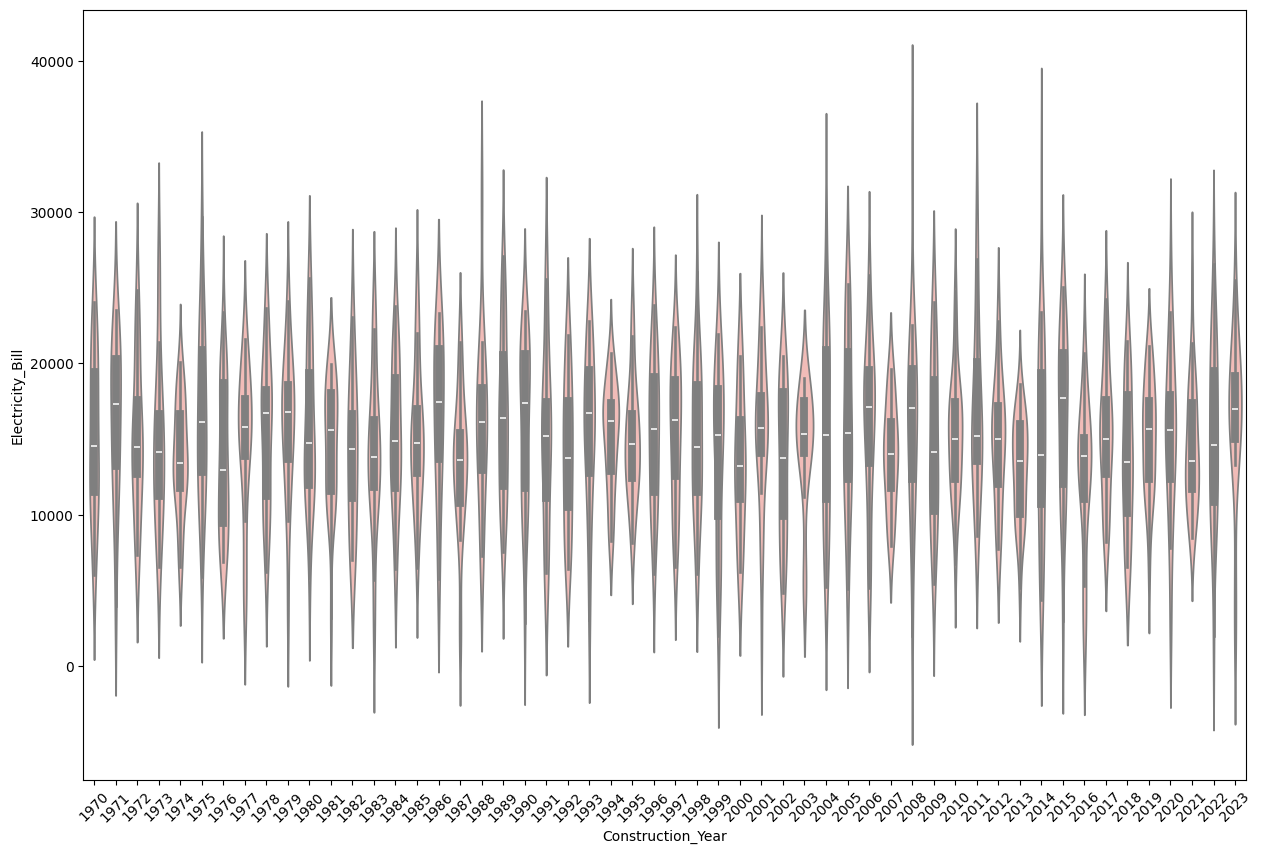

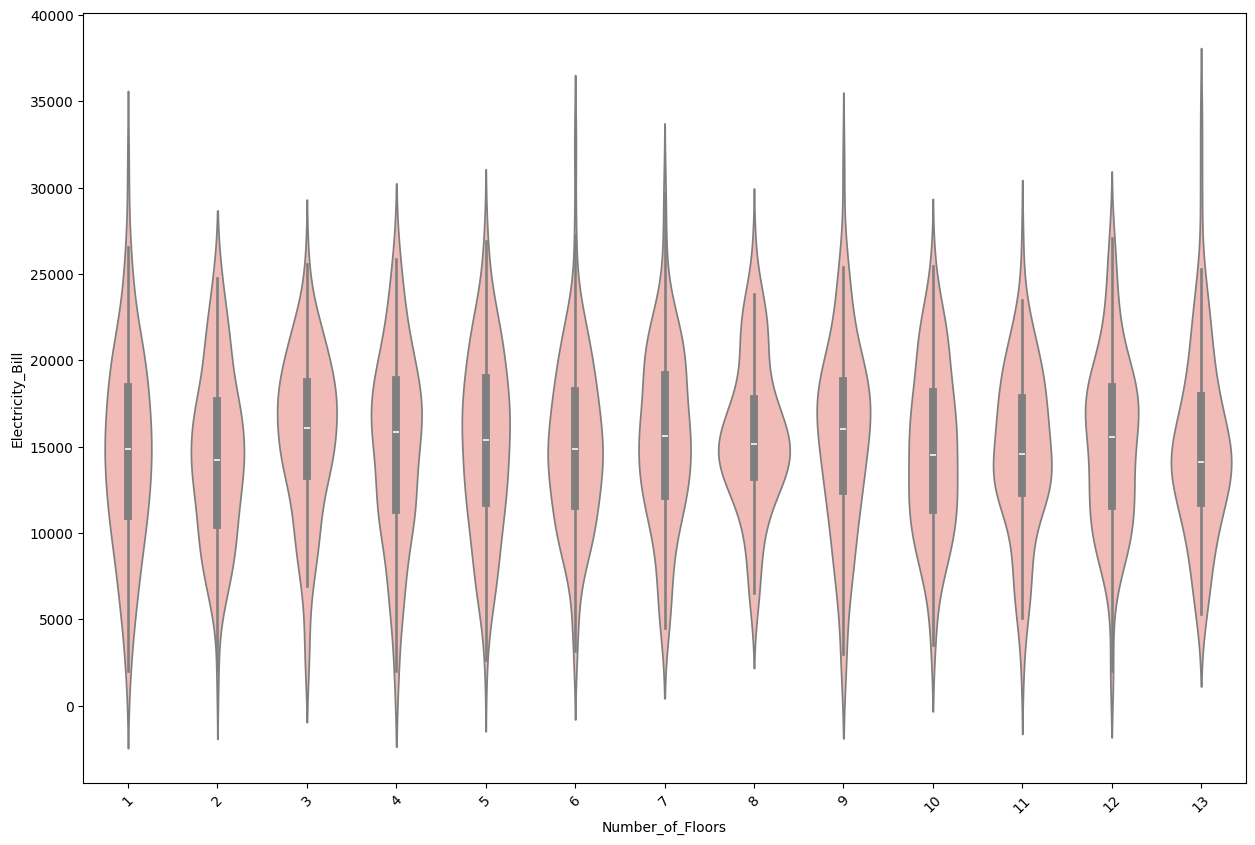

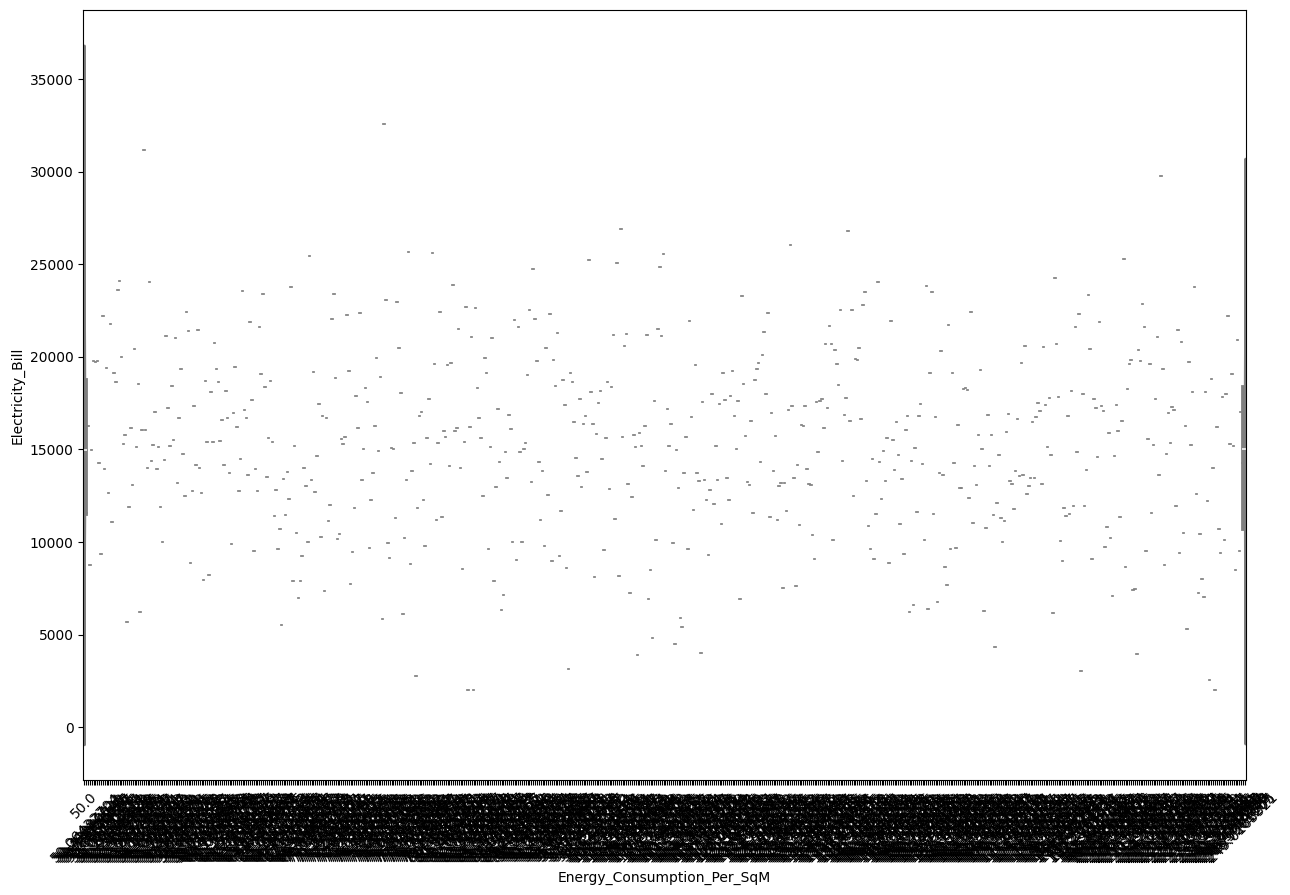

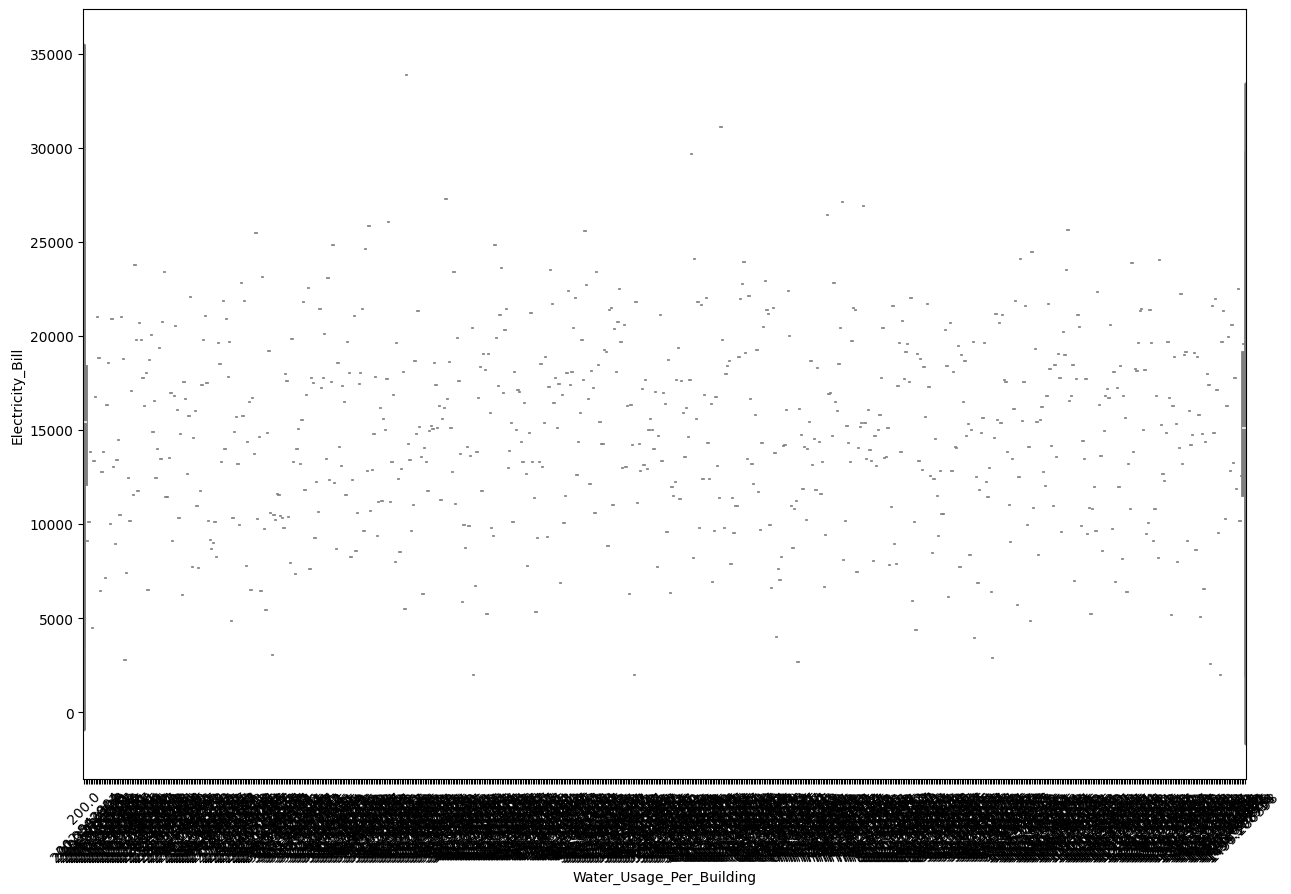

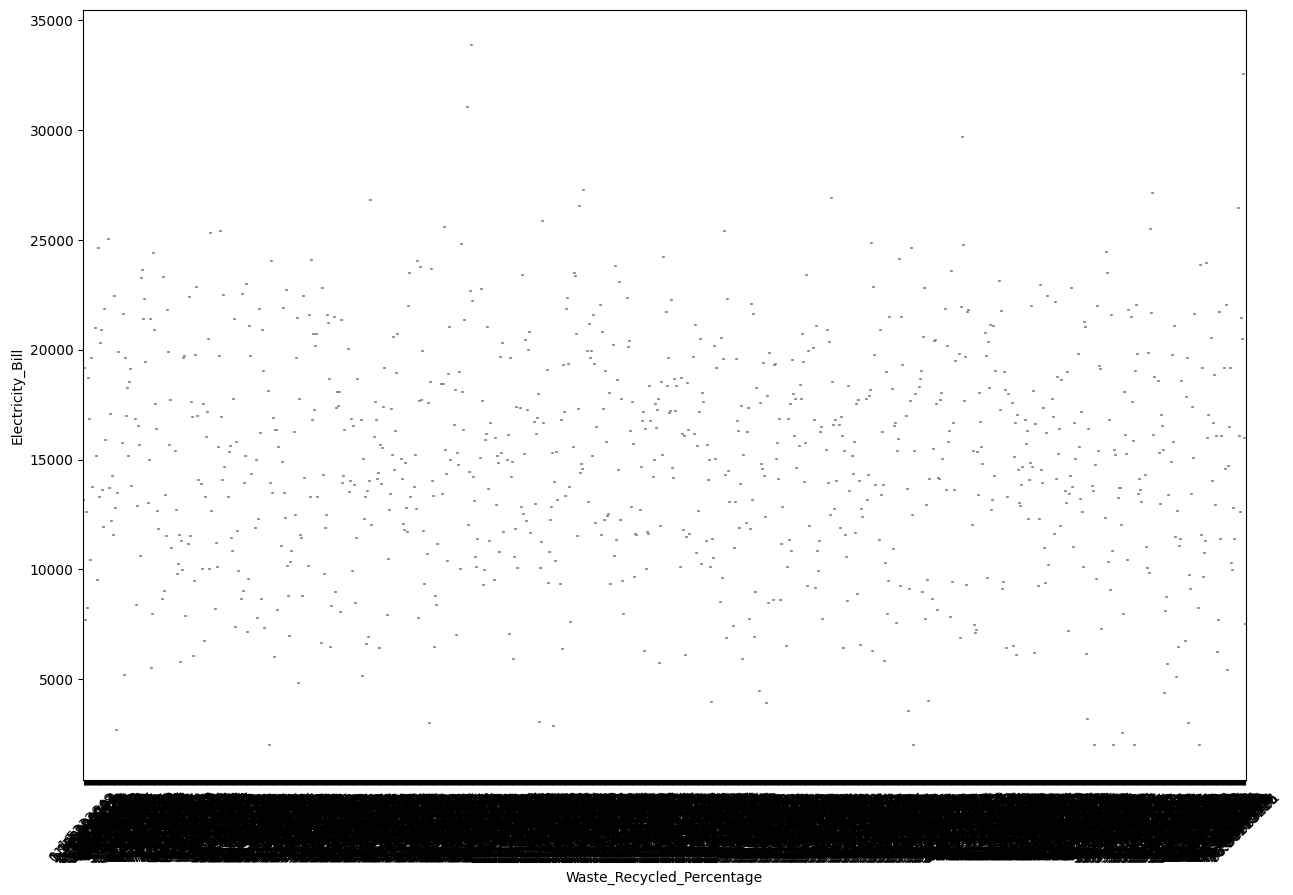

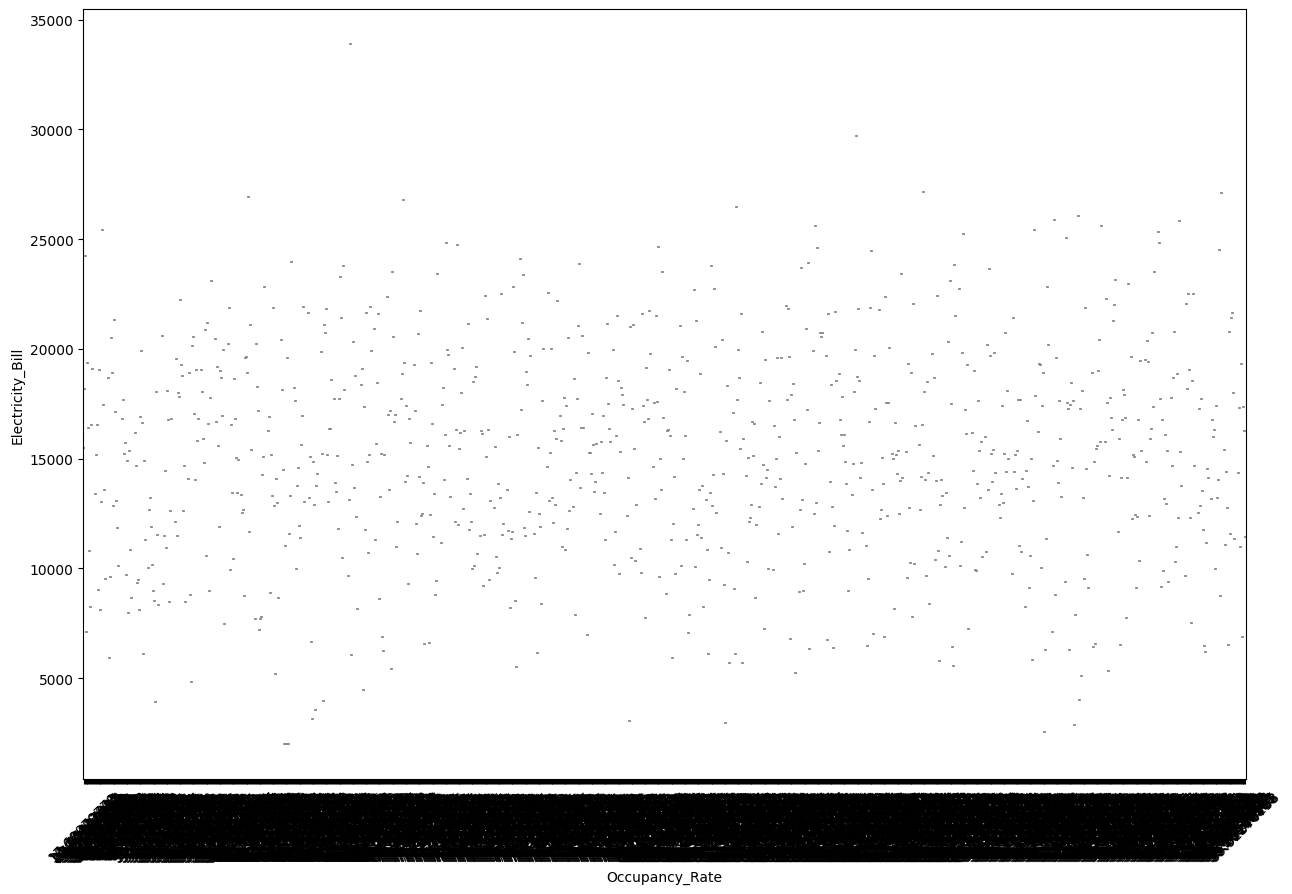

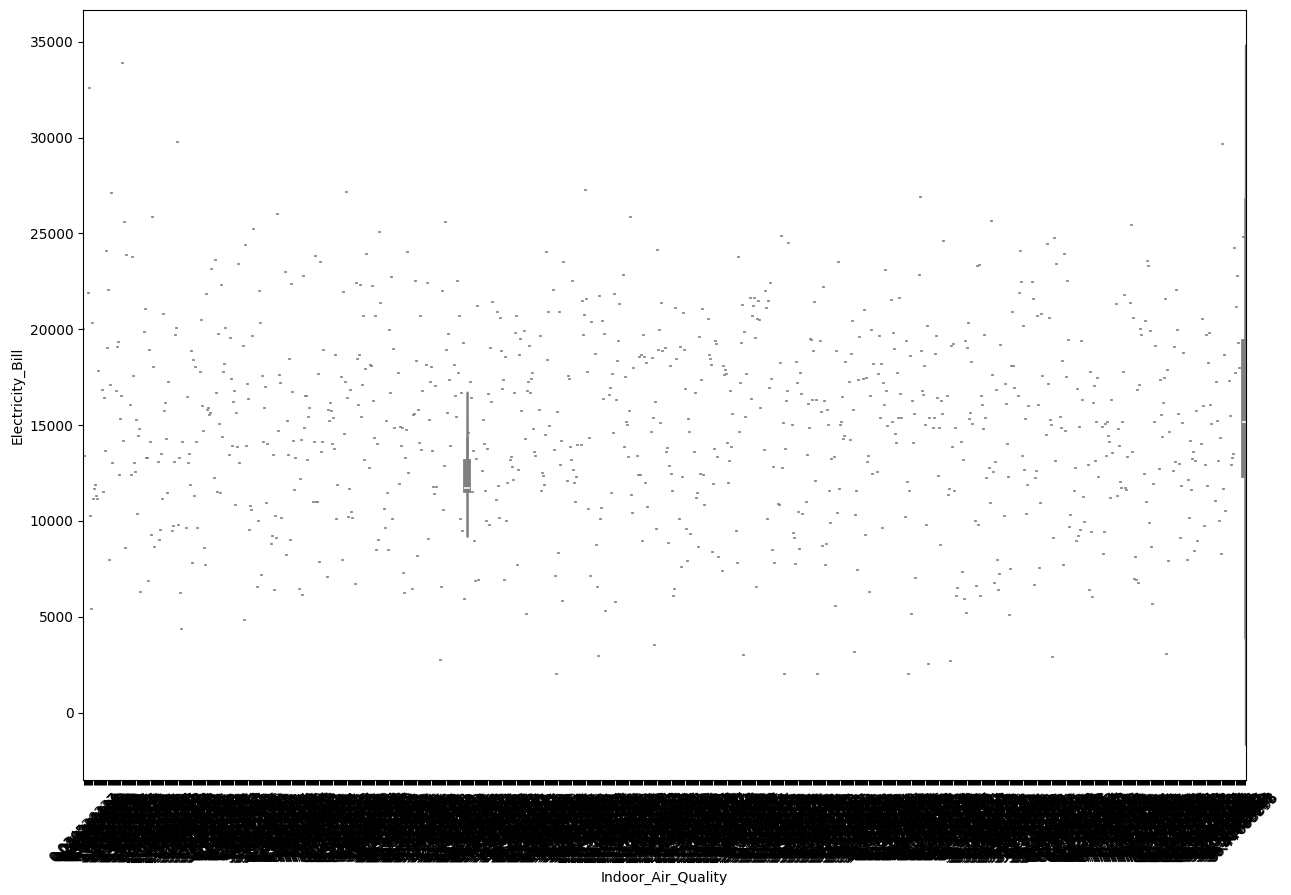

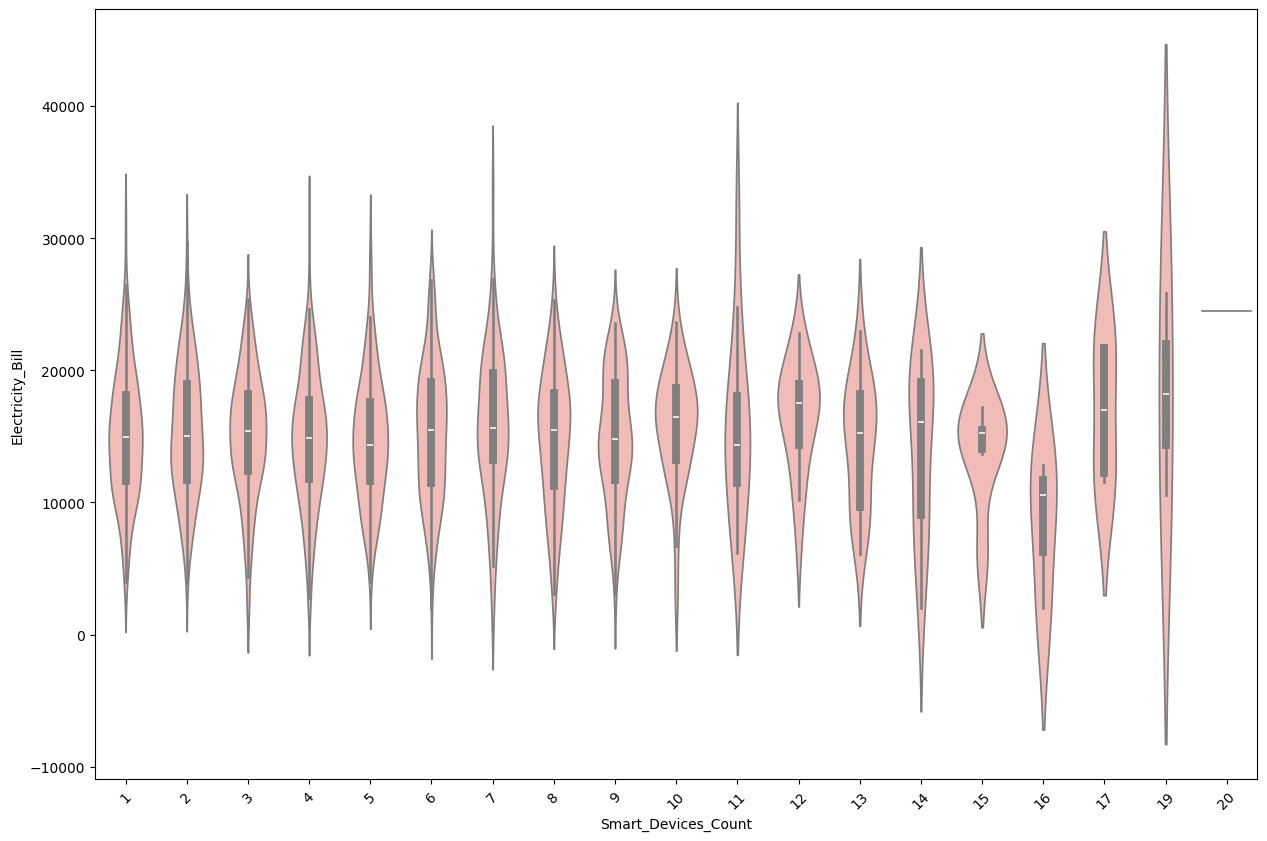

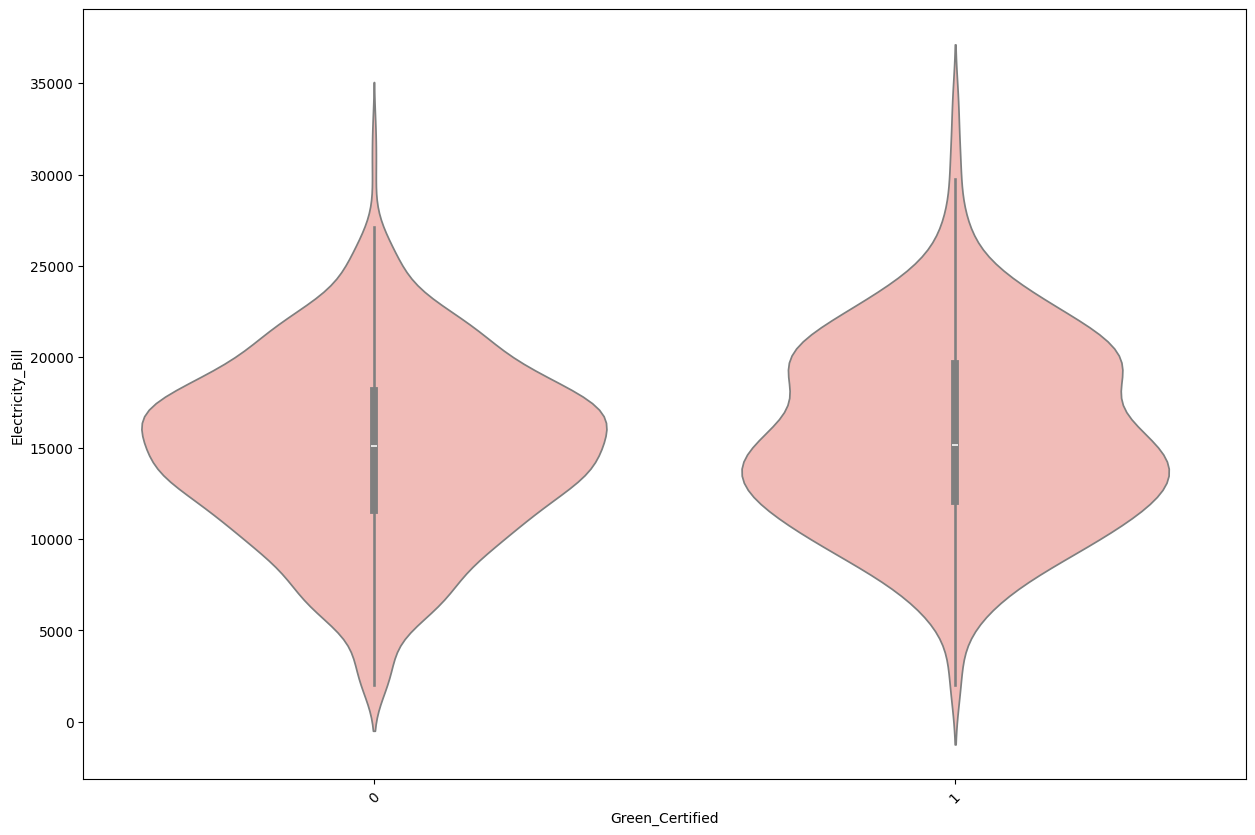

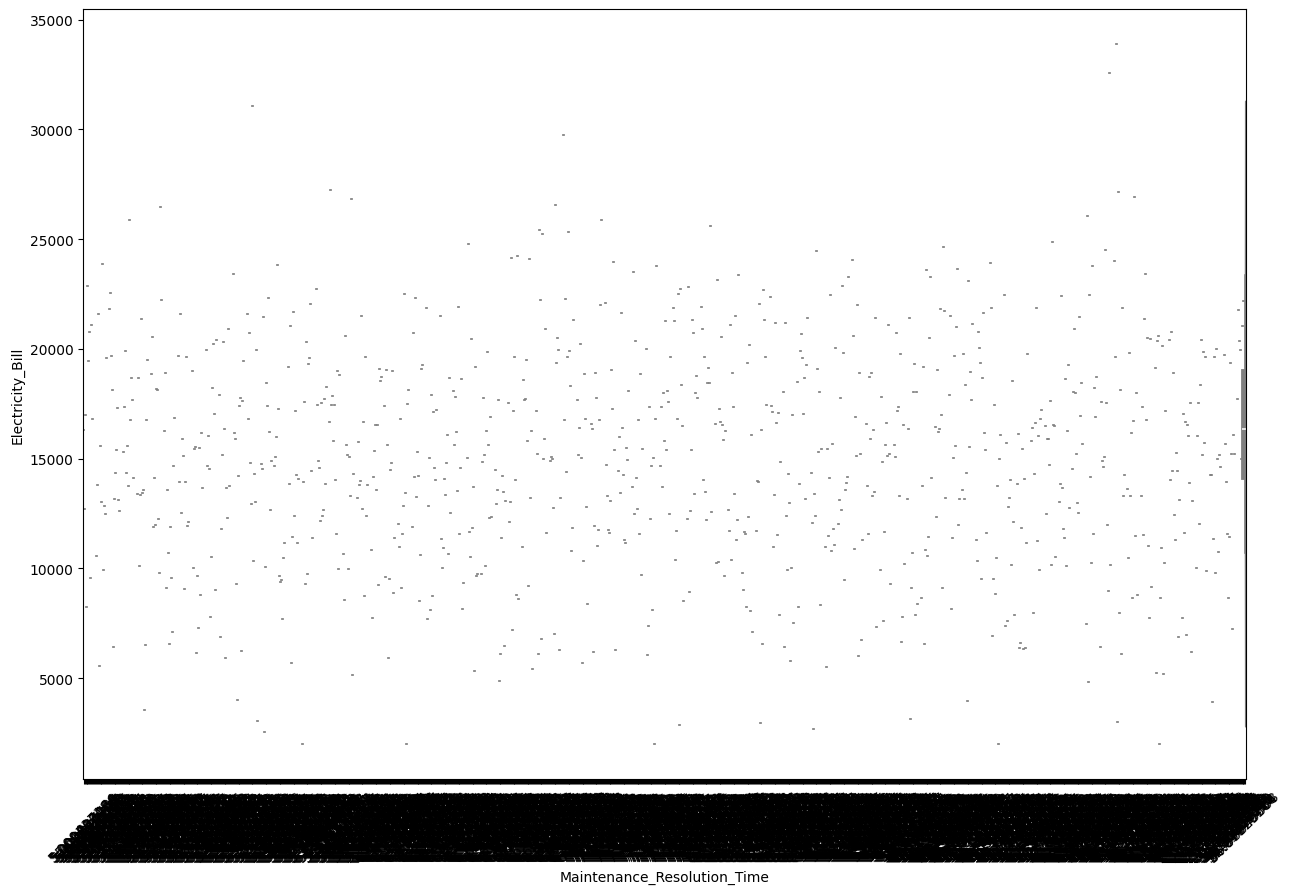

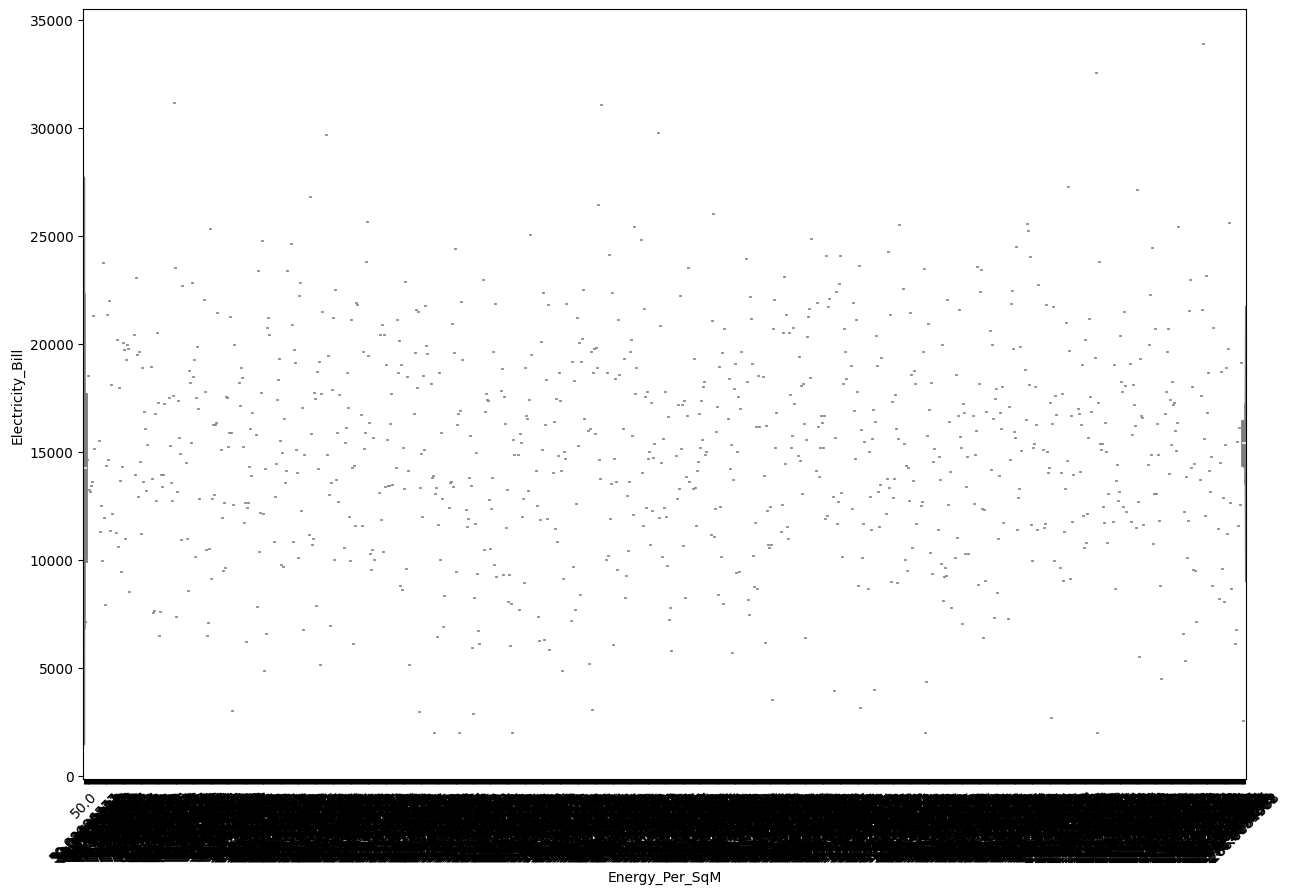

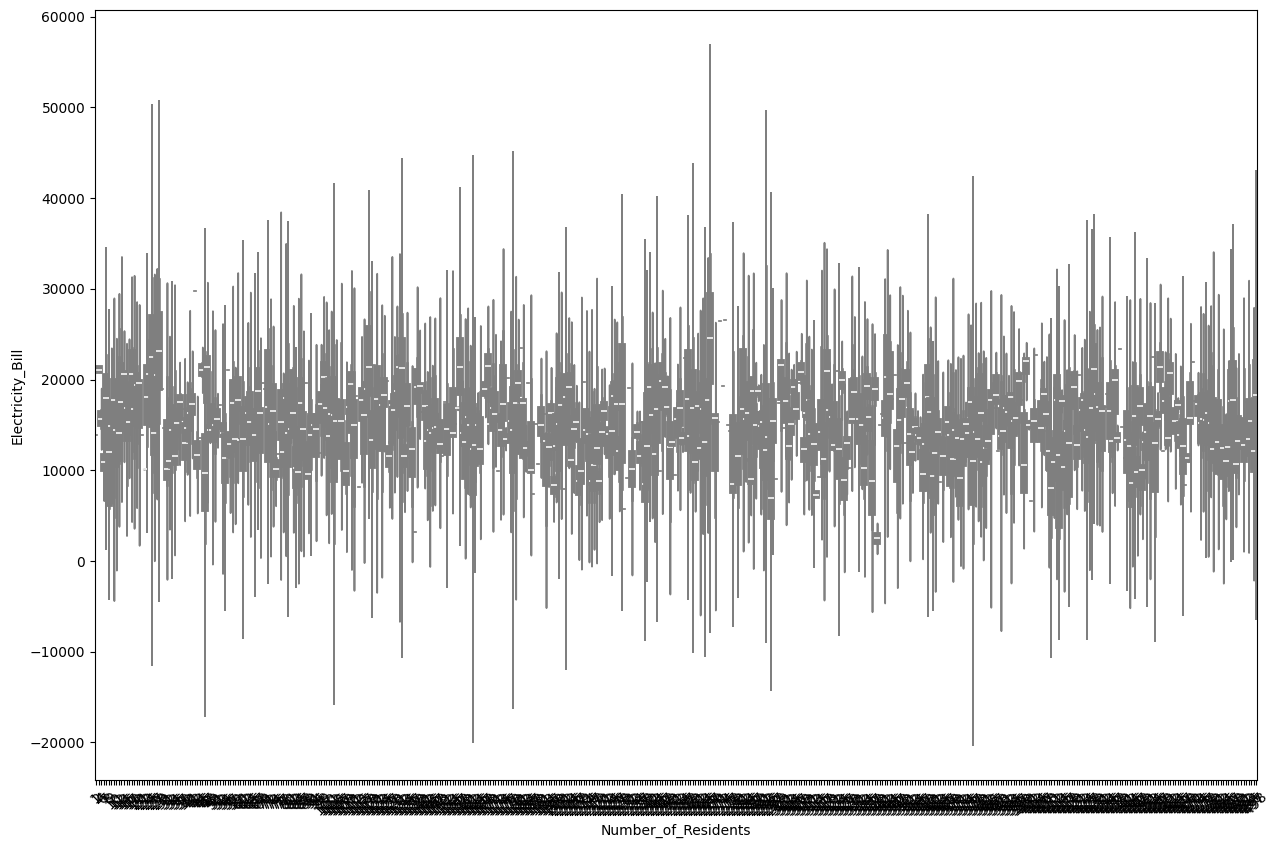

In [18]:
# Violin Plot

for f in numerical_features.columns:
  plt.figure(figsize=(15, 10))
  sns.violinplot(x=X[f], y=df['Electricity_Bill'])
  plt.xticks(rotation=45)
  plt.show()

# plt.figure(figsize=(15, 10))
# sns.violinplot(data=numerical_features)
# plt.xticks(rotation=45)
# plt.show()

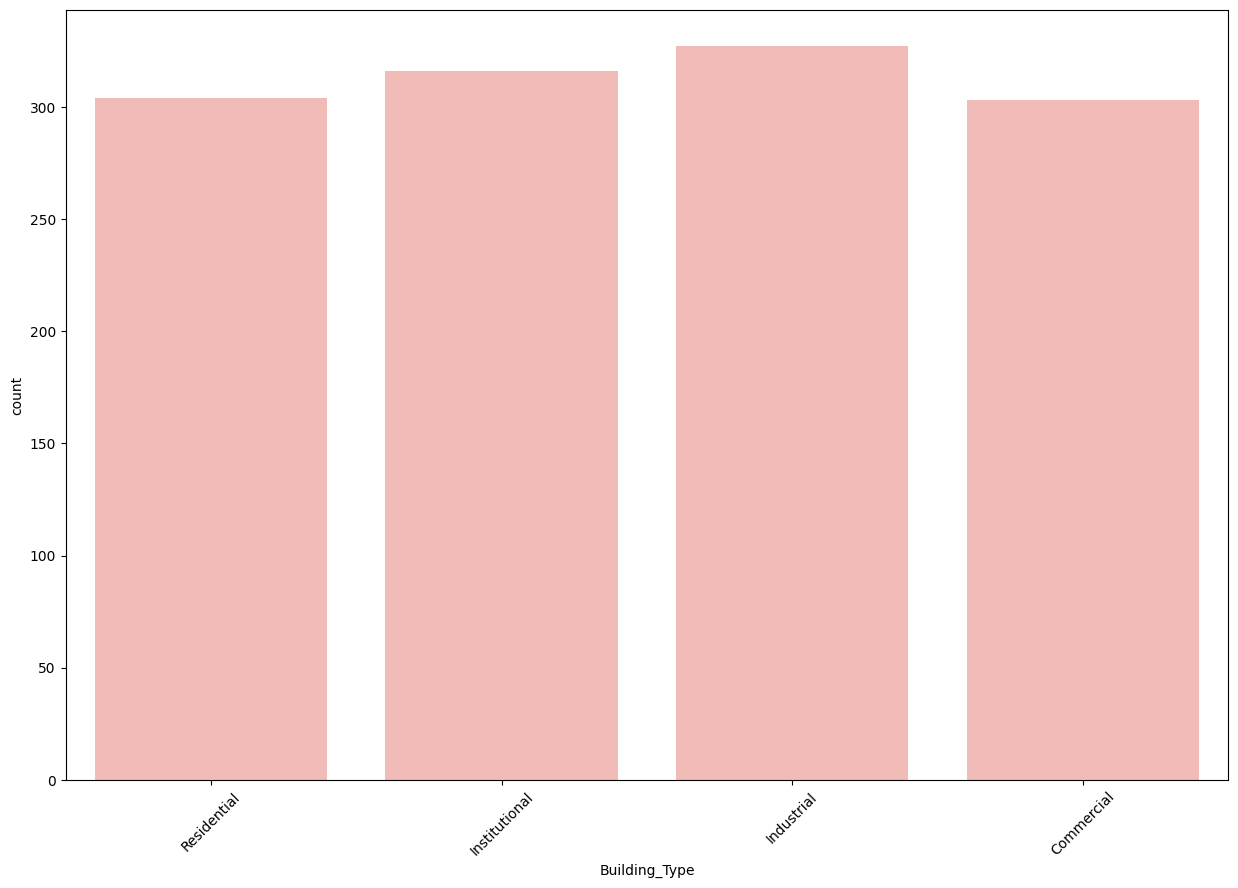

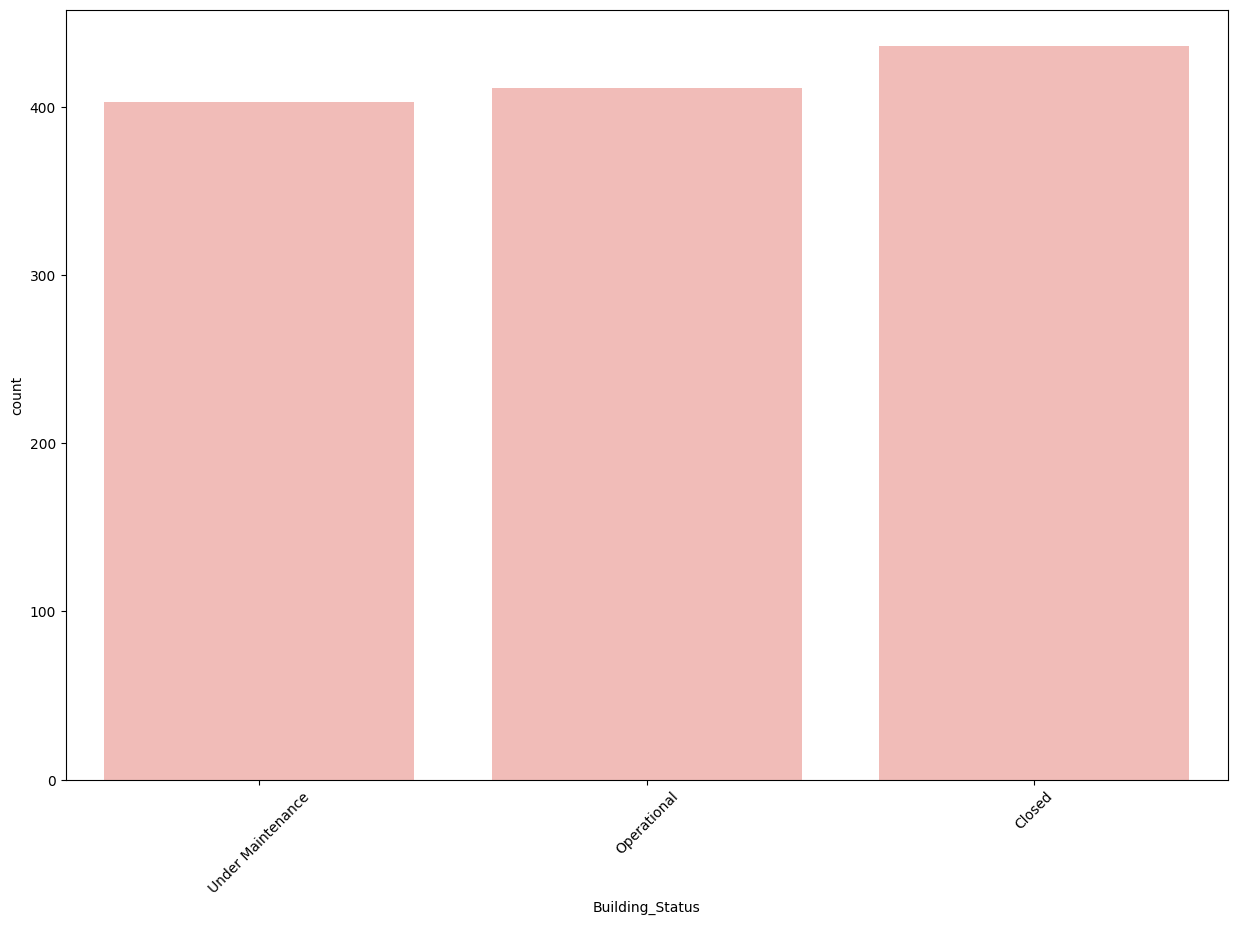

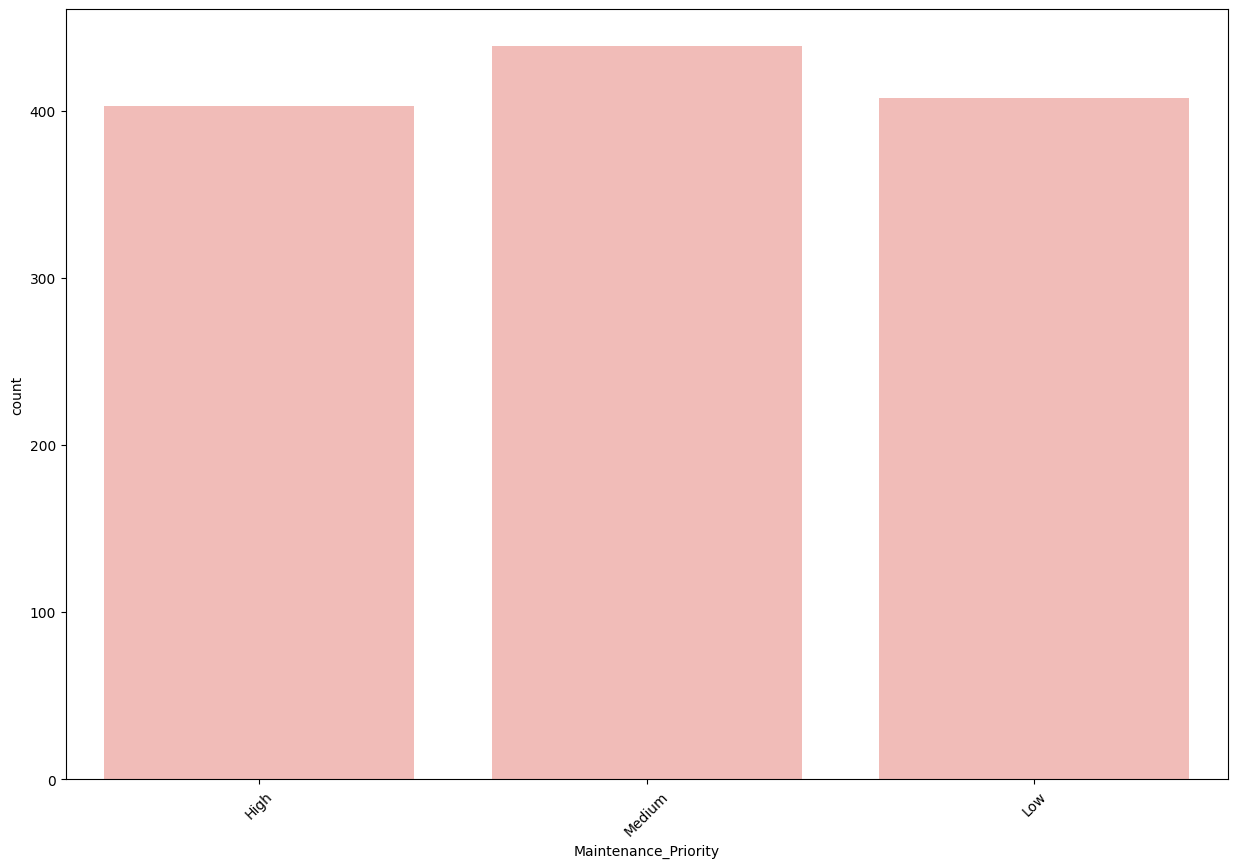

In [19]:
# Count Plot

for f in categorical_features.columns:
  plt.figure(figsize=(15, 10))
  sns.countplot(X, x=X[f])
  plt.xticks(rotation=45)
  plt.show()

# plt.figure(figsize=(15, 10))
# sns.countplot(data=numerical_features)
# plt.xticks(rotation=45)
# plt.show()

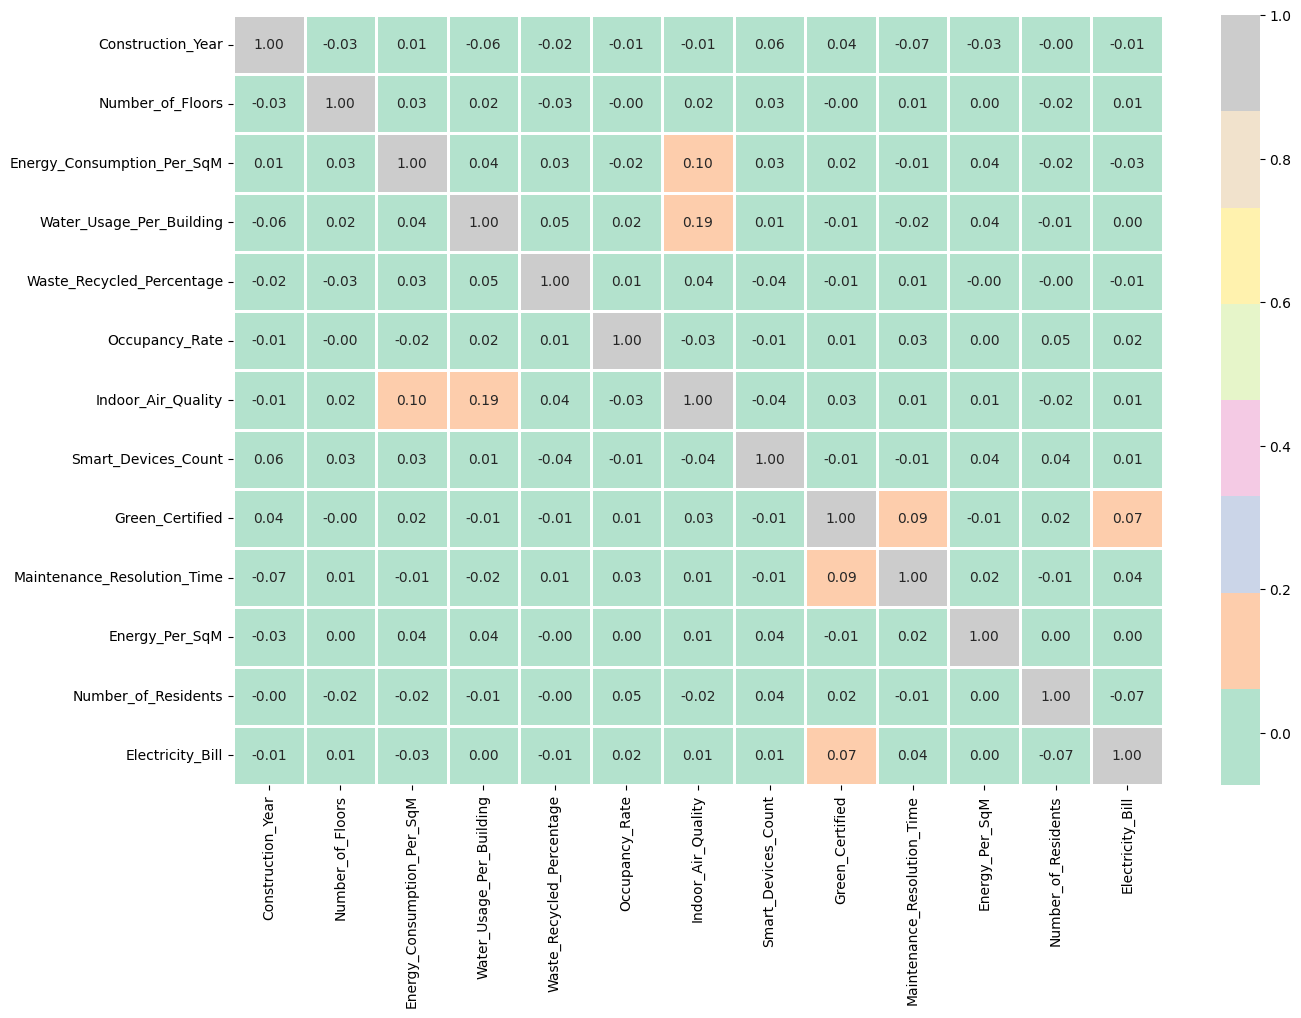

In [20]:
# Correlation Heatmap
numerical_features['Electricity_Bill'] = df['Electricity_Bill']

plt.figure(figsize=(15, 10))
sns.heatmap(numerical_features.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.show()

# **PART B**

In [21]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Electricity Bill.csv"
df = pd.read_csv(path)

In [22]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00


In [23]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [24]:
# Cleaning the data
scaled_numerical_features = StandardScaler().fit_transform(numerical_features)

In [25]:
# UMAP Algorithm to reduce the data dimension to 2

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_numerical_features)

In [26]:
embedding.shape

(1250, 2)

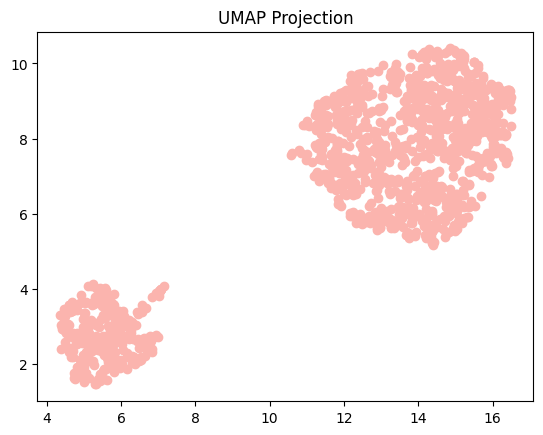

In [27]:
# Scatter plot of UMAP results
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP Projection')
plt.show()

# **PART C**

In [28]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Electricity Bill.csv"
df = pd.read_csv(path)

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])

# Categorical features
categorical_features = X.select_dtypes(include=['object'])

In [30]:
# Data Preprocessing

# Handling missing values

# For numerical features
numerical_features.fillna(numerical_features.mean(), inplace=True)
X[numerical_features.columns] = numerical_features

# For categorical features
categorical_features.fillna(categorical_features.mode().iloc[0], inplace=True)
X[categorical_features.columns] = categorical_features

In [31]:
df.shape

(1250, 16)

In [32]:
# Normalizing numerical features

numerical_features_scaled = StandardScaler().fit_transform(numerical_features)

X[numerical_features.columns] = numerical_features_scaled

In [33]:
print(f"Shape of numerical_features_scaled: {numerical_features_scaled.shape}")
print(f"Shape of df: {df.shape}")

Shape of numerical_features_scaled: (1250, 12)
Shape of df: (1250, 16)


In [34]:
# Label Encoding

labelencoder = LabelEncoder()
for f in categorical_features.columns:
    X[f] = labelencoder.fit_transform(X[f])

In [35]:
X['Building_Type'].unique()

array([3, 2, 1, 0])

In [36]:
X.head()

Building_Type  Construction_Year  Number_of_Floors  \
0              3          -0.492995          1.294186   
1              2          -1.066600         -0.296505   
2              1           0.590482          0.763956   
3              0          -0.747930         -1.622080   
4              1           0.590482          1.294186   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   -0.814197                 -0.349153   
1                    1.621769                 -0.921691   
2                   -0.138455                 -0.921691   
3                   -0.558199                 -0.921691   
4                   -0.814197                 -0.618406   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   1.205746        0.300178           -0.793583   
1                   1.081897       -2.132641           -0.900518   
2                  -0.713141       -1.906147           -0.378754   
3                   1.778415       -0.062917           -1.157493   
4                  -0.116644        1.274310           -1.146958   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0             0.232814        -0.558254                    -0.350170   
1             1.464636        -0.558254                     3.568630   
2            -0.999007         1.791300                    -0.493831   
3            -0.999007        -0.558254                    -0.624403   
4             4.236234        -0.558254                    -0.372132   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  
0                2                     0        0.467149             0.751504  
1                2                     0       -0.186815            -1.116230  
2                1                     2        0.622638            -0.949592  
3                0                     1        1.524152            -0.644089  
4                0                     2       -0.285571             0.043293

In [37]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

In [38]:
# Evaluation metrics

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
adj_r2_train = adjusted_r2(r2_train, X_train, y_train)
adj_r2_test = adjusted_r2(r2_test, X_test, y_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R^2 Score: {r2_train}")
print(f"Adjusted R^2 Score: {adj_r2_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R^2 Score: {r2_test}")
print(f"Adjusted R^2 Score: {adj_r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")

Training Set Metrics:
Mean Squared Error (MSE): 24475013.16847547
Root Mean Squared Error (RMSE): 4947.222773281538
R^2 Score: 0.013922520844610209
Adjusted R^2 Score: -0.0011091480449536562
Mean Absolute Error (MAE): 4006.3284693293604

Testing Set Metrics:
Mean Squared Error (MSE): 24278016.155742627
Root Mean Squared Error (RMSE): 4927.272689403604
R^2 Score: 3.734473307526187e-05
Adjusted R^2 Score: -0.06406282547634312
Mean Absolute Error (MAE): 3842.409312558516


# **PART D**

In [39]:
rfe = RFE(estimator=regr, n_features_to_select=3)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

In [40]:
selected_features

Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')

In [41]:
# Create a new training set
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

regr_selected = linear_model.LinearRegression()
regr_selected.fit(X_train_selected, y_train)

# Predict using the new model
y_pred_train_selected = regr_selected.predict(X_train_selected)
y_pred_test_selected = regr_selected.predict(X_test_selected)

In [42]:
mse_train_selected = mean_squared_error(y_train, y_pred_train_selected)
mse_test_selected = mean_squared_error(y_test, y_pred_test_selected)
rmse_train_selected = np.sqrt(mse_train_selected)
rmse_test_selected = np.sqrt(mse_test_selected)
r2_train_selected = r2_score(y_train, y_pred_train_selected)
r2_test_selected = r2_score(y_test, y_pred_test_selected)
adj_r2_train_selected = adjusted_r2(r2_train_selected, X_train_selected, y_train)
adj_r2_test_selected = adjusted_r2(r2_test_selected, X_test_selected, y_test)
mae_train_selected = mean_absolute_error(y_train, y_pred_train_selected)
mae_test_selected = mean_absolute_error(y_test, y_pred_test_selected)

print(f"Training Set Metrics with Selected Features:")
print(f"Mean Squared Error (MSE): {mse_train_selected}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_selected}")
print(f"R^2 Score: {r2_train_selected}")
print(f"Adjusted R^2 Score: {adj_r2_train}")
print(f"Mean Absolute Error (MAE): {mae_train_selected}")

print(f"\nTesting Set Metrics with Selected Features:")
print(f"Mean Squared Error (MSE): {mse_test_selected}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_selected}")
print(f"R^2 Score: {r2_test_selected}")
print(f"Adjusted R^2 Score: {adj_r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test_selected}")

Training Set Metrics with Selected Features:
Mean Squared Error (MSE): 24569032.906897984
Root Mean Squared Error (RMSE): 4956.715939702212
R^2 Score: 0.010134545491284008
Adjusted R^2 Score: -0.0011091480449536562
Mean Absolute Error (MAE): 4006.473377514736

Testing Set Metrics with Selected Features:
Mean Squared Error (MSE): 23941409.062998384
Root Mean Squared Error (RMSE): 4892.995918964002
R^2 Score: 0.013901513867940807
Adjusted R^2 Score: -0.06406282547634312
Mean Absolute Error (MAE): 3813.948128176773


# **PART E**

In [43]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Electricity Bill.csv"
df = pd.read_csv(path)

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])

# Categorical features
categorical_features = X.select_dtypes(include=['object'])

In [45]:
# Preprocessing data

numerical_features.fillna(numerical_features.mean(), inplace=True)
categorical_features.fillna(categorical_features.mode().iloc[0], inplace=True)

# Combine the filled numerical and categorical features back into the train_data
X[numerical_features.columns] = numerical_features
X[categorical_features.columns] = categorical_features

In [46]:
# Normalizing numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

X[numerical_features.columns] = numerical_features_scaled
X

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential          -0.492995          1.294186   
1     Institutional          -1.066600         -0.296505   
2        Industrial           0.590482          0.763956   
3        Commercial          -0.747930         -1.622080   
4        Industrial           0.590482          1.294186   
...             ...                ...               ...   
1245    Residential          -0.747930          0.763956   
1246     Commercial           0.654216         -0.561620   
1247     Commercial          -0.429261         -1.622080   
1248  Institutional           1.546491         -0.296505   
1249    Residential           1.291555          0.233725   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      -0.814197                 -0.349153   
1                       1.621769                 -0.921691   
2                      -0.138455                 -0.921691   
3                      -0.558199                 -0.921691   
4                      -0.814197                 -0.618406   
...                          ...                       ...   
1245                    0.538693                  0.063698   
1246                   -0.814197                  0.441281   
1247                   -0.814197                  1.758716   
1248                    1.957740                  1.758716   
1249                    0.486135                  1.758716   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                      1.205746        0.300178           -0.793583   
1                      1.081897       -2.132641           -0.900518   
2                     -0.713141       -1.906147           -0.378754   
3                      1.778415       -0.062917           -1.157493   
4                     -0.116644        1.274310           -1.146958   
...                         ...             ...                 ...   
1245                   0.047486        0.505058            0.321212   
1246                  -0.323531        1.340273            1.765470   
1247                   1.068640        1.111465           -0.800280   
1248                   1.660693       -0.629991           -0.800280   
1249                  -0.921972        0.014213           -0.800280   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                0.232814        -0.558254                    -0.350170   
1                1.464636        -0.558254                     3.568630   
2               -0.999007         1.791300                    -0.493831   
3               -0.999007        -0.558254                    -0.624403   
4                4.236234        -0.558254                    -0.372132   
...                   ...              ...                          ...   
1245             1.156680        -0.558254                    -0.191156   
1246            -0.075141        -0.558254                    -0.554101   
1247            -1.306962        -0.558254                    -0.415629   
1248             0.232814        -0.558254                     0.659125   
1249            -0.999007         1.791300                    -0.549090   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High        0.467149   
1     Under Maintenance                 High       -0.186815   
2           Operational               Medium        0.622638   
3                Closed                  Low        1.524152   
4                Closed               Medium       -0.285571   
...                 ...                  ...             ...   
1245        Operational                  Low       -1.304953   
1246             Closed                  Low       -0.009314   
1247  Under Maintenance               Medium       -0.837412   
1248        Operational               Medium        0.196359   
1249  Under Maintenance                  Low       -1.646834   

      Number_of_R

In [47]:
categorical_features

Building_Type    Building_Status Maintenance_Priority
0       Residential  Under Maintenance                 High
1     Institutional  Under Maintenance                 High
2        Industrial        Operational               Medium
3        Commercial             Closed                  Low
4        Industrial             Closed               Medium
...             ...                ...                  ...
1245    Residential        Operational                  Low
1246     Commercial             Closed                  Low
1247     Commercial  Under Maintenance               Medium
1248  Institutional        Operational               Medium
1249    Residential  Under Maintenance                  Low

[1250 rows x 3 columns]

In [48]:
# Encoding the categorical features using One-Hot Encoding

encoded = pd.get_dummies(X, columns=categorical_features.columns)
encoded

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0             -0.492995          1.294186                   -0.814197   
1             -1.066600         -0.296505                    1.621769   
2              0.590482          0.763956                   -0.138455   
3             -0.747930         -1.622080                   -0.558199   
4              0.590482          1.294186                   -0.814197   
...                 ...               ...                         ...   
1245          -0.747930          0.763956                    0.538693   
1246           0.654216         -0.561620                   -0.814197   
1247          -0.429261         -1.622080                   -0.814197   
1248           1.546491         -0.296505                    1.957740   
1249           1.291555          0.233725                    0.486135   

      Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                    -0.349153                   1.205746        0.300178   
1                    -0.921691                   1.081897       -2.132641   
2                    -0.921691                  -0.713141       -1.906147   
3                    -0.921691                   1.778415       -0.062917   
4                    -0.618406                  -0.116644        1.274310   
...                        ...                        ...             ...   
1245                  0.063698                   0.047486        0.505058   
1246                  0.441281                  -0.323531        1.340273   
1247                  1.758716                   1.068640        1.111465   
1248                  1.758716                   1.660693       -0.629991   
1249                  1.758716                  -0.921972        0.014213   

      Indoor_Air_Quality  Smart_Devices_Count  Green_Certified  \
0              -0.793583             0.232814        -0.558254   
1              -0.900518             1.464636        -0.558254   
2              -0.378754            -0.999007         1.791300   
3              -1.157493            -0.999007        -0.558254   
4              -1.146958             4.236234        -0.558254   
...                  ...                  ...              ...   
1245            0.321212             1.156680        -0.558254   
1246            1.765470            -0.075141        -0.558254   
1247           -0.800280            -1.306962        -0.558254   
1248           -0.800280             0.232814        -0.558254   
1249           -0.800280            -0.999007         1.791300   

      Maintenance_Resolution_Time  ...  Building_Type_Commercial  \
0                       -0.350170  ...                     False   
1                        3.568630  ...                     False   
2                       -0.493831  ...                     False   
3                       -0.624403  ...                      True   
4                       -0.372132  ...                     False   
...                           ...  ...                       ...   
1245                    -0.191156  ...                     False   
1246                    -0.554101  ...                      True   
1247                    -0.415629  ...                      True   
1248                     0.659125  ...                     False   
1249                    -0.549090  ...                     False   

      Building_Type_Industrial  Building_Type_Institutional  \
0                        False                        False   
1                        False                         True   
2                         True                        False   
3                        False                        False   
4                         True                        False   
...                        ...                          ...   
1245                     False                        False   
1246                     False                        False   
1247                     Fa

In [49]:
# Ridge Regression

X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size=0.2, random_state=42)

ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [50]:
# Evaluation metrics

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
adj_r2_train_ridge = adjusted_r2(r2_train, X_train, y_train)
adj_r2_test_ridge = adjusted_r2(r2_test, X_test, y_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R^2 Score: {r2_train}")
print(f"Adjusted R^2 Score: {adj_r2_train_ridge}")
print(f"Mean Absolute Error (MAE): {mae_train}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R^2 Score: {r2_test}")
print(f"Adjusted R^2 Score: {adj_r2_test_ridge}")
print(f"Mean Absolute Error (MAE): {mae_test}")

Training Set Metrics:
Mean Squared Error (MSE): 24188931.13202012
Root Mean Squared Error (RMSE): 4918.224388132379
R^2 Score: 0.025448522951235675
Adjusted R^2 Score: 0.0035036585755213734
Mean Absolute Error (MAE): 3976.7183561620413

Testing Set Metrics:
Mean Squared Error (MSE): 24129096.278434932
Root Mean Squared Error (RMSE): 4912.137648563498
R^2 Score: 0.006171054957969435
Adjusted R^2 Score: -0.09014716879059748
Mean Absolute Error (MAE): 3797.5080199375825


# **PART F**

In [51]:
# Independent Component Analysis (ICA) on the one-hot encoded dataset

results = []

components_list = [4, 5, 6, 8]

for n_components in components_list:

    ica = decomposition.FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    regr = linear_model.LinearRegression()
    regr.fit(X_train_ica, y_train)

    y_pred_train = regr.predict(X_train_ica)
    y_pred_test = regr.predict(X_test_ica)

    # Evaluation metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    adj_r2_train = adjusted_r2(r2_train, X_train_ica, y_train)
    adj_r2_test = adjusted_r2(r2_test, X_test_ica, y_test)

    results.append({
        'n_components': n_components,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'Adjusted R2_train': adj_r2_train,
        'Adjusted R2_test': adj_r2_test,
        'MAE_train': mae_train,
        'MAE_test': mae_test
    })

for result in results:
    print(f"Results for {result['n_components']} components:")
    print(f"MSE Train: {result['MSE_train']}, MSE Test: {result['MSE_test']}")
    print(f"RMSE Train: {result['RMSE_train']}, RMSE Test: {result['RMSE_test']}")
    print(f"R^2 Train Score: {result['R2_train']}, R^2 Test Score: {result['R2_test']}")
    print(f"Adjusted R^2 Train: {result['Adjusted R2_train']}, Adjusted R^2 Test Score: {result['Adjusted R2_test']}")
    print(f"MAE Train: {result['MAE_train']}, MAE Test: {result['MAE_test']}")
    print("\n")

Results for 4 components:
MSE Train: 24713262.592420127, MSE Test: 24406551.71736853
RMSE Train: 4971.243565992329, RMSE Test: 4940.298747785252
R^2 Train Score: 0.004323654042929781, R^2 Test Score: -0.005256776527704066
Adjusted R^2 Train: 0.00032093506420793894, Adjusted R^2 Test Score: -0.02166913206285015
MAE Train: 4014.128368168214, MAE Test: 3851.2681146440223


Results for 5 components:
MSE Train: 24667322.37554589, MSE Test: 24495852.12916488
RMSE Train: 4966.620820592799, RMSE Test: 4949.328452342285
R^2 Train Score: 0.006174546336035869, R^2 Test Score: -0.008934880880360874
Adjusted R^2 Train: 0.0011754243357140481, Adjusted R^2 Test Score: -0.02960977598036818
MAE Train: 4013.0389373216444, MAE Test: 3851.044953822016


Results for 6 components:
MSE Train: 24666272.12773407, MSE Test: 24472592.174683336
RMSE Train: 4966.5150888459075, RMSE Test: 4946.978085122607
R^2 Train Score: 0.006216859927764662, R^2 Test Score: -0.007976850137834557
Adjusted R^2 Train: 0.00021212796

# **PART G**

In [52]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Electricity Bill.csv"
df = pd.read_csv(path)

In [53]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])

# Categorical features
categorical_features = X.select_dtypes(include=['object'])

In [54]:
# Preprocessing data

# Handling missing values

numerical_features.fillna(numerical_features.mean(), inplace=True)
categorical_features.fillna(categorical_features.mode().iloc[0], inplace=True)

X[numerical_features.columns] = numerical_features
X[categorical_features.columns] = categorical_features

In [55]:
# Normalizing numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

X[numerical_features.columns] = numerical_features_scaled

In [56]:
# Label Encoding
labelencoder = LabelEncoder()
for f in categorical_features.columns:
    X[f] = labelencoder.fit_transform(X[f])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# ElasticNet Regularization

alphas = [0.1, 0.4, 0.7, 0.9]

results = []

for a in alphas:
    elasticnet = linear_model.ElasticNet(alpha=a, l1_ratio=0.5)
    elasticnet.fit(X_train, y_train)

    y_pred_test_elasticnet = elasticnet.predict(X_test)

    # Evaluation metrics
    mse_test = mean_squared_error(y_test, y_pred_test_elasticnet)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test_elasticnet)
    mae_test = mean_absolute_error(y_test, y_pred_test_elasticnet)
    adj_r2_test = adjusted_r2(r2_test, X_test, y_test)

    results.append({
        'alpha': a,
        'MSE_test': mse_test,
        'RMSE_test': rmse_test,
        'R2_test': r2_test,
        'Adjusted R2_test': adj_r2_test,
        'MAE_test': mae_test
    })

for result in results:
    print(f"Results for alpha = {result['alpha']}")
    print(f"MSE Test: {result['MSE_test']}")
    print(f"RMSE Test: {result['RMSE_test']}")
    print(f"R^2 Test Score: {result['R2_test']}")
    print(f"Adjusted R^2 Test Score: {result['Adjusted R2_test']}")
    print(f"MAE Test: {result['MAE_test']}")
    print("\n")

Results for alpha = 0.1
MSE Test: 24266701.42894355
RMSE Test: 4926.124382203879
R^2 Test Score: 0.0005033755727057443
Adjusted R^2 Test Score: -0.06356692086494142
MAE Test: 3841.093815452926


Results for alpha = 0.4
MSE Test: 24245407.877904005
RMSE Test: 4923.962619466562
R^2 Test Score: 0.0013804141124682534
Adjusted R^2 Test Score: -0.06263366190596331
MAE Test: 3838.336192362858


Results for alpha = 0.7
MSE Test: 24235588.288183544
RMSE Test: 4922.965395793834
R^2 Test Score: 0.0017848632629884342
Adjusted R^2 Test Score: -0.06220328652784568
MAE Test: 3836.49632693302


Results for alpha = 0.9
MSE Test: 24232651.194060057
RMSE Test: 4922.667081375711
R^2 Test Score: 0.0019058362625798964
Adjusted R^2 Test Score: -0.062074558848793204
MAE Test: 3835.4764941060243




# **PART H**

In [59]:
# Gradient Boosting Regressor

gbr = ensemble.GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

In [60]:
# Evaluation metrics

mse_train = mean_squared_error(y_train, y_pred_train_gbr)
mse_test = mean_squared_error(y_test, y_pred_test_gbr)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train_gbr)
r2_test = r2_score(y_test, y_pred_test_gbr)
adj_r2_train = adjusted_r2(r2_train, X_train, y_train)
adj_r2_test = adjusted_r2(r2_test, X_test, y_test)
mae_train = mean_absolute_error(y_train, y_pred_train_gbr)
mae_test = mean_absolute_error(y_test, y_pred_test_gbr)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R^2 Score: {r2_train}")
print(f"Adjusted R^2 Score: {adj_r2_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R^2 Score: {r2_test}")
print(f"Adjusted R^2 Score: {adj_r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")

Training Set Metrics:
Mean Squared Error (MSE): 14926446.257307768
Root Mean Squared Error (RMSE): 3863.475929432946
R^2 Score: 0.39862616633389714
Adjusted R^2 Score: 0.38945888228410896
Mean Absolute Error (MAE): 3092.7481886865007

Testing Set Metrics:
Mean Squared Error (MSE): 24546630.867385298
Root Mean Squared Error (RMSE): 4954.455658029981
R^2 Score: -0.011026354976772401
Adjusted R^2 Score: -0.0758357367060527
Mean Absolute Error (MAE): 3836.588529495024
